# <span style="color:cyan">ΚΑΘΟΡΙΣΜΟΣ ΤΟΥ DIRECTORY ΟΠΟΥ ΒΡΙΣΚΕΤΑΙ ΤΟ ΑΡΧΕΙΟ

In [134]:
pwd # Καθορίζει το path file του αρχείου που εκτελείται

'C:\\Users\\Λεωνίδας\\uoa_py_course\\Final_assignment_Stylianou'

# <span style="color:cyan">ΕΙΣΑΓΩΓΗ ΤΩΝ ΑΠΑΡΑΙΤΡΗΤΩΝ ΒΙΒΛΙΟΘΗΚΩΝ ΓΙΑ ΤΗΝ ΕΚΤΕΛΕΣΗ ΤΟΥ ΚΩΔΙΚΑ


In [135]:
# Βιβλιοθήκες που χρησιμοποιούνται για την εισαγωγή και επεξεργασία των δεδομένων
import random
import numpy as np
import pandas as pd
import warnings as wr
from collections import Counter
from itertools import combinations


# Βιβλιοθήκες που χρησιμοποιούνται για τη δημιουργία γραφικών παραστάσεων
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Βιβλιοθήκες που χρησιμοποιούνται για την εκπαίδευση μοντέλων μηχανικής μάθησης 
import tensorflow as tf
from sklearn.svm import SVC
from minisom import MiniSom
from keras.layers import Dense
from keras.layers import Input
import sklearn.neighbors as knn
from itertools import combinations
from keras.models import Sequential
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score,recall_score, f1_score, roc_auc_score, confusion_matrix,ConfusionMatrixDisplay, roc_curve, precision_recall_curve, auc

ModuleNotFoundError: No module named 'tensorflow'

# <span style="color:cyan">ΚΑΘΟΡΙΣΜΟΣ ΑΚΡΙΒΕΙΑΣ ΤΟΥ ΜΟΝΤΕΛΟΥ


In [136]:
# Καθορισμός ακριβείας του μοντέλου
pd.set_option("display.precision", 2)

# <span style="color:cyan">ΕΙΣΑΓΩΓΗ ΚΑΙ ΕΠΕΞΕΡΓΑΣΙΑ ΤΟΥ ΑΡΧΕΙΟΥ ΠΟΥ ΕΙΝΑΙ ΑΠΑΡΑΙΤΗΤΟ ΓΙΑ ΤΗΝ ΕΚΤΕΛΕΣΗ ΤΟΥ ΑΛΓΟΡΙΘΜΟΥ


In [137]:
# Αναγνώριση του αρχείου και εισαγωγή του στο πρόγραμμα
df = pd.read_csv('data/loan_sanction_test.csv')

df = df.drop('Loan_ID', axis=1)

# Δημιουργία DataFrame
df.head() 

# Εμφάνιση του τύπου του αρχείου
type(df)

# Δίνει την εκτύπωση των πέντε πρώτων στηλών των δεδομένων
print(df.head())

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male     Yes          0      Graduate            No             5720   
1   Male     Yes          1      Graduate            No             3076   
2   Male     Yes          2      Graduate            No             5000   
3   Male     Yes          2      Graduate            No             2340   
4   Male      No          0  Not Graduate            No             3276   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0       110.0             360.0             1.0   
1               1500       126.0             360.0             1.0   
2               1800       208.0             360.0             1.0   
3               2546       100.0             360.0             NaN   
4                  0        78.0             360.0             1.0   

  Property_Area  
0         Urban  
1         Urban  
2         Urban  
3         Urban  
4         Urban  


# <span style="color:cyan">ΣΥΝΟΠΤΙΚΗ ΠΑΡΟΥΣΙΑΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ ΠΡΙΝ ΑΠΟ ΤΗΝ ΑΦΑΙΡΕΣΗ ΤΟΝ ΤΙΜΩΝ ΠΟΥ ΤΕΙΝΟΥΝ ΣΤΟ ΑΠΕΙΡΟ ΚΑΙ ΤΩΝ ΤΙΜΩΝ NaN


In [138]:
# Επιστρέφει το σύνολο των γραμμών του αρχείου στο οποίο βρίσκονται τα δεδομένα
len(df)

367

In [139]:
# Επιστρέφει τα ονόματα των στηλών του αρχείου στο οποίο βρίσκονται τα δεδομένα
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [269]:
# Δίνει τον τύπο των δεδομένων που περιέχονται στις στήλες του αρχείου
df.dtypes

Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int64
dtype: object

In [141]:
# Ορίζει της μεταβλητές που περιέχουν τιμές 0 και 1 ως κατηγορικές για λόγους παρουσίασης και κατανόησης των δεδομένων. Η εντολή θα εκτελεστεί στην επόμενη ενότητα μετά την καθαρισμό των τιμών που τείνουν στο άπειρο και των τιμών NaN καθώς το πρόγραμμα δε θα μπορεί να τρέξει την εντολή για τον έλεγχο των τιμών που τείνουν στο άπειρο αν υπάρχουν κατηγορικές μεταβλητές στο dataset.

# for column in df.columns:
    # if set(df[column].unique()) == {0, 1}:
        #df[column] = df[column].astype('category')

In [142]:
# Επιστρέφει τα στατιστικά περιγραφικά στοιχεία κάθε μεταβλητής του dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.00,367.00,362.00,361.00,338.00
mean,4805.60,1569.58,136.13,342.54,0.83
std,4910.69,2334.23,61.37,65.16,0.38
min,0.00,0.00,28.00,6.00,0.00
25%,2864.00,0.00,100.25,360.00,1.00
50%,3786.00,1025.00,125.00,360.00,1.00
75%,5060.00,2430.50,158.00,360.00,1.00
max,72529.00,24000.00,550.00,480.00,1.00


In [143]:
# Επιστρέφει τον τύπο των δεδομένων που περιέχονται στις στήλες του αρχείου
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [144]:
# Εκτυπώνει το είδος της κάθε μεταβλητής του dataset 
print(df.dtypes)

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


# <span style="color:cyan">ΕΠΕΞΕΡΓΑΣΙΑ ΤΟΥ DATASET ΚΑΙ ΕΚΑΘΑΡΙΣΜΟΣ ΤΩΝ ΤΙΜΩΝ ΠΟΥ ΤΕΙΝΟΥΝ ΣΤΟ ΑΠΕΙΡΟ ΚΑΙ ΤΩΝ ΤΙΜΩΝ NaN


In [145]:
# Αντικατάσταση των τιμών των κατηγορικών μεταβλητών με αριθμούς
df['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
df['Married'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3}, inplace=True)
df['Education'].replace({'Not Graduate': 0, 'Graduate': 1}, inplace=True)
df['Self_Employed'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['Property_Area'].replace({'Urban': 0, 'Semiurban': 1, 'Rural': 2}, inplace=True)

In [146]:
# Ελέγχει αν υπάρχουν τιμές στο dataset που τείνουν στο άπειρο
if np.any(np.isinf(df)):
    print("Data contains infinite values. Replacing them with NaN.")
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [147]:
# Ελέγχει αν υπάρχουν τιμές NaN στο dataset. 
if df.isnull().values.any():
    print("Data contains NaN values. Please handle missing data before proceeding.")
    df.dropna(inplace=True)

Data contains NaN values. Please handle missing data before proceeding.


# <span style="color:cyan">ΣΥΝΟΠΤΙΚΗ ΠΑΡΟΥΣΙΑΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ


In [148]:
# Επιστρέφει το σύνολο των γραμμών του αρχείου στο οποίο βρίσκονται τα δεδομένα
len(df)

289

In [149]:
# Επιστρέφει τα ονόματα των στηλών του αρχείου στο οποίο βρίσκονται τα δεδομένα
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [151]:
# Δίνει τον τύπο των δεδομένων που περιέχονται στις στήλες του αρχείου
df.dtypes

Gender               float64
Married                int64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [152]:
# Ορίζει της μεταβλητές που περιέχουν τιμές 0 και 1 ως κατηγορικές για λόγους παρουσίασης και κατανόησης των δεδομένων
for column in df.columns:
    if set(df[column].unique()) == {0, 1}:
        df[column] = df[column].astype('category')

In [90]:
# Επιστρέφει τα στατιστικά περιγραφικά στοιχεία κάθε μεταβλητής του dataset
df.describe()

NameError: name 'df' is not defined

In [153]:
# Ομαδοποιεί τα δεδομένα βάσει της στήλης "Self_Employed", υπολογίζει διάφορα στατιστικά μέτρα για κάθε ομάδα
df.groupby("Self_Employed", observed=True).describe().T

Self_Employed                 0.0       1.0
Dependents        count    257.00     32.00
                  mean       0.80      0.81
                  std        1.06      1.12
                  min        0.00      0.00
                  25%        0.00      0.00
                  50%        0.00      0.00
                  75%        2.00      2.00
                  max        3.00      3.00
ApplicantIncome   count    257.00     32.00
                  mean    4577.55   5117.66
                  std     5008.18   2413.24
                  min        0.00   1599.00
                  25%     2868.00   3340.50
                  50%     3747.00   4871.00
                  75%     4960.00   6972.50
                  max    72529.00  10890.00
CoapplicantIncome count    257.00     32.00
                  mean    1548.50   1365.75
                  std     2457.60   1615.67
                  min        0.00      0.00
                  25%        0.00      0.00
                  50%      910.00    294.00
                  75%     2393.00   2553.50
                  max    24000.00   4831.00
LoanAmount        count    257.00     32.00
                  mean     136.34    140.44
                  std       60.56     53.04
                  min       28.00     50.00
                  25%      102.00    103.25
                  50%      126.00    125.00
                  75%      155.00    187.00
                  max      460.00    260.00
Loan_Amount_Term  count    257.00     32.00
                  mean     343.74    334.12
                  std       63.69     80.42
                  min        6.00     12.00
                  25%      360.00    360.00
                  50%      360.00    360.00
                  75%      360.00    360.00
                  max      480.00    480.00
Property_Area     count    257.00     32.00
                  mean       0.89      1.16
                  std        0.82      0.88
                  min        0.00      0.00
                  25%        0.00      0.00
                  50%        1.00      1.00
                  75%        2.00      2.00
                  max        2.00      2.00

In [154]:
# Επιστρέφει τον τύπο των δεδομένων που περιέχονται στις στήλες του αρχείου
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             289 non-null    category
 1   Married            289 non-null    category
 2   Dependents         289 non-null    float64 
 3   Education          289 non-null    category
 4   Self_Employed      289 non-null    category
 5   ApplicantIncome    289 non-null    int64   
 6   CoapplicantIncome  289 non-null    int64   
 7   LoanAmount         289 non-null    float64 
 8   Loan_Amount_Term   289 non-null    float64 
 9   Credit_History     289 non-null    category
 10  Property_Area      289 non-null    int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 17.8 KB


In [155]:
# Εκτυπώνει το είδος της κάθε μεταβλητής του dataset
print(df.dtypes)

Gender               category
Married              category
Dependents            float64
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome       int64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area           int64
dtype: object


# <span style="color:cyan">ΔΗΜΙΟΥΡΓΙΑ ΙΔΙΟΥ ΣΤΥΛ ΚΑΙ ΜΕΓΕΘΟΥΣ ΓΡΑΦΙΚΩΝ ΠΑΡΑΣΤΑΣΕΩΝ

In [156]:
# Η εντολή style.available επιστρέφει μια λίστα με τα διαθέσιμα στυλ γραφικών παραστάσεων. Αυτά τα στυλ μπορούν να χρησιμοποιηθούν για να αλλάξουν την εμφάνιση των διαγραμμάτων.
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [157]:
# Η εντολή style.use("dark_background") ορίζει το στυλ των γραφικών παραστάσεων σε "dark_background", προσφέροντας μια σκοτεινή θεματολογία για όλα τα διαγράμματα.
style.use("dark_background")  

# Η εντολή ορίζει το προεπιλεγμένο μέγεθος των διαγραμμάτων σε 14x8 ίντσες.
plt.rcParams['figure.figsize'] = (14, 8)

# <span style="color:cyan">ΔΙΑΓΡΑΜΜΑΤΑ

<span style="color:blueviolet">Διαγράμμτα Διασποράς με βάση την Κατηγορία της Μεταβλητής 'Self_Employed' για όλες τις Μεταβλητές

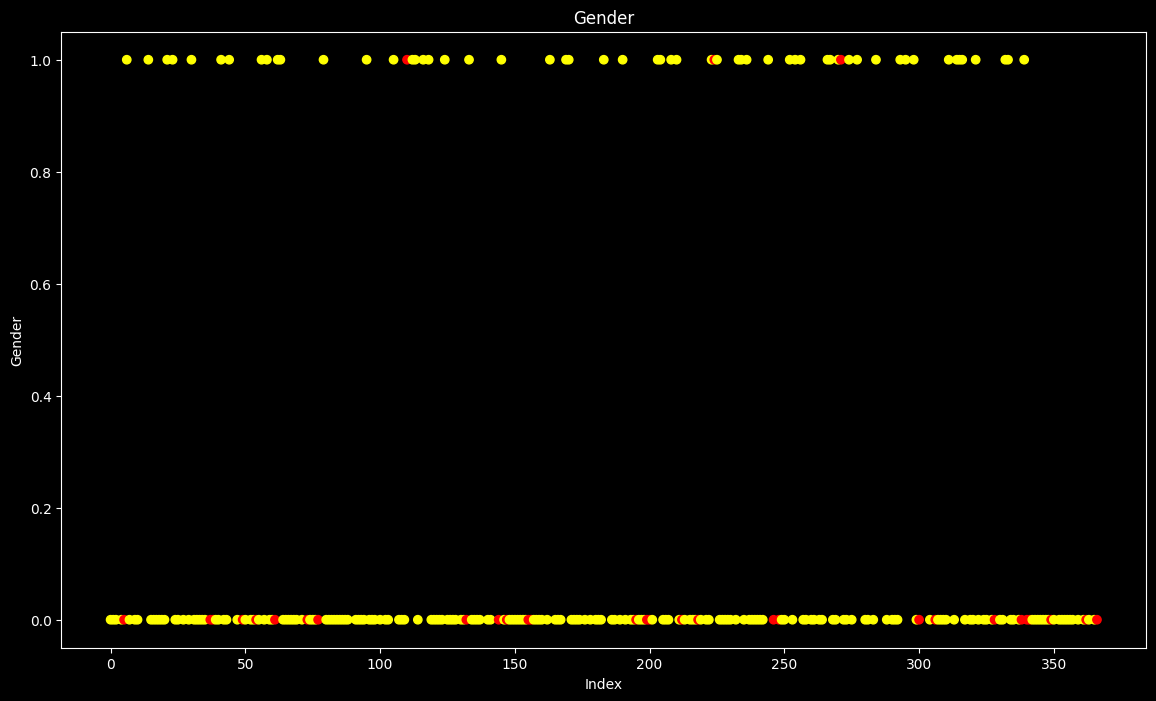

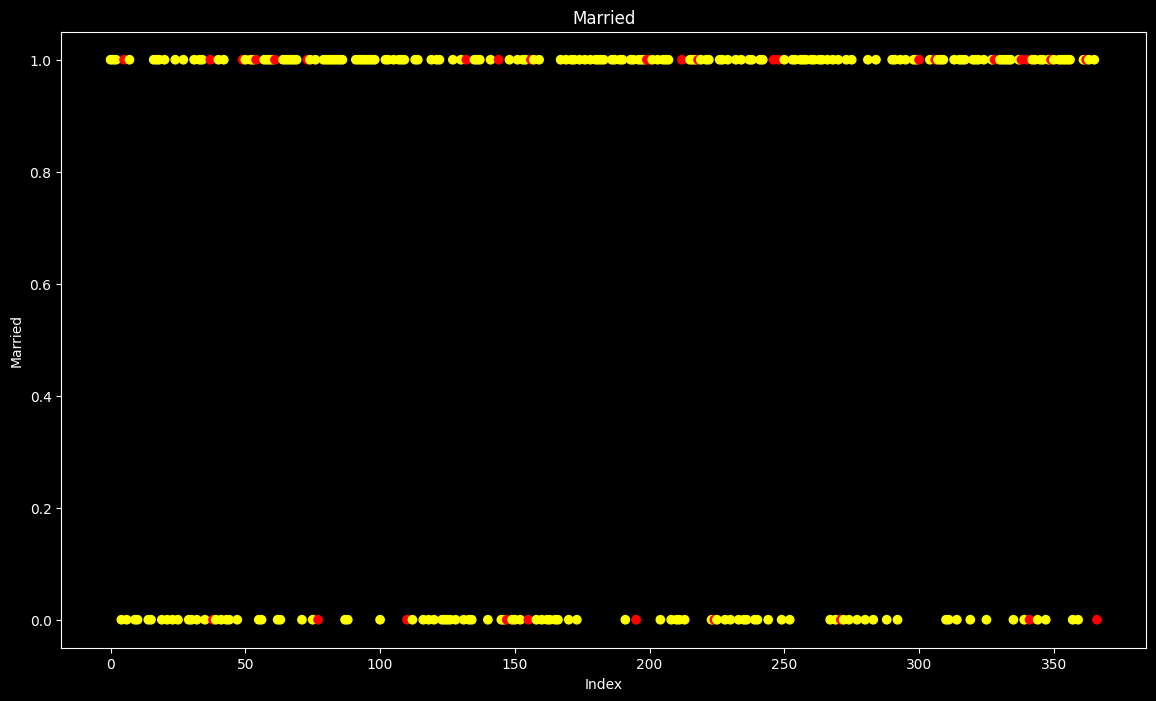

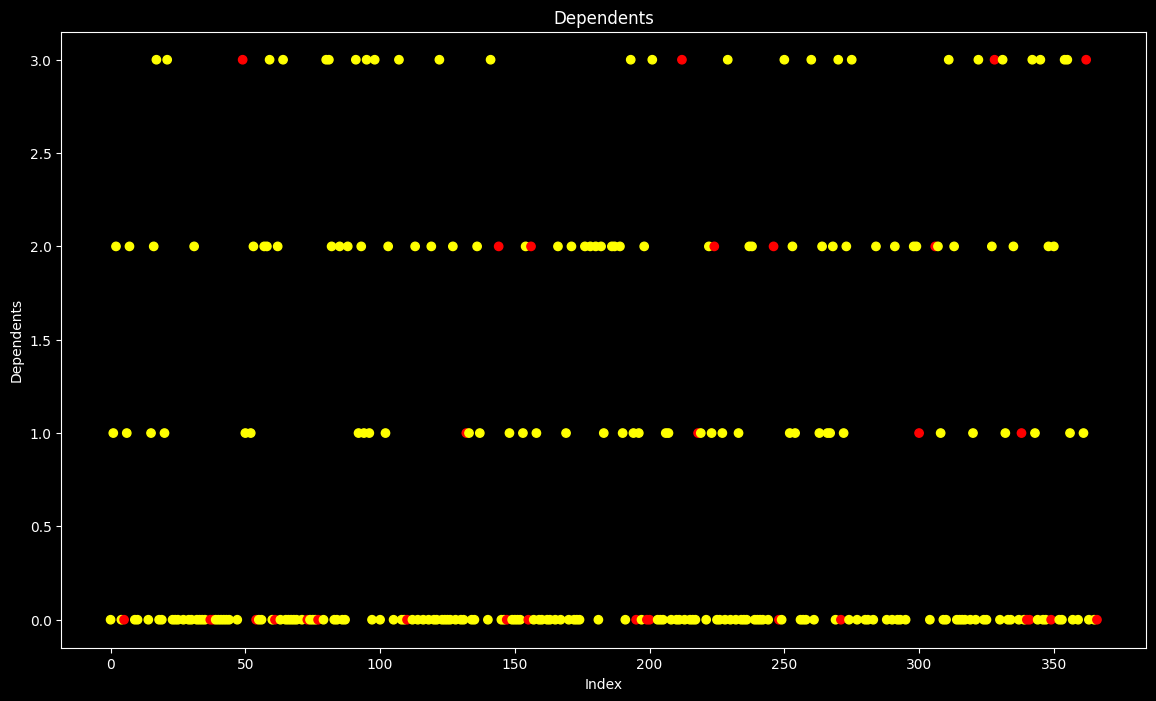

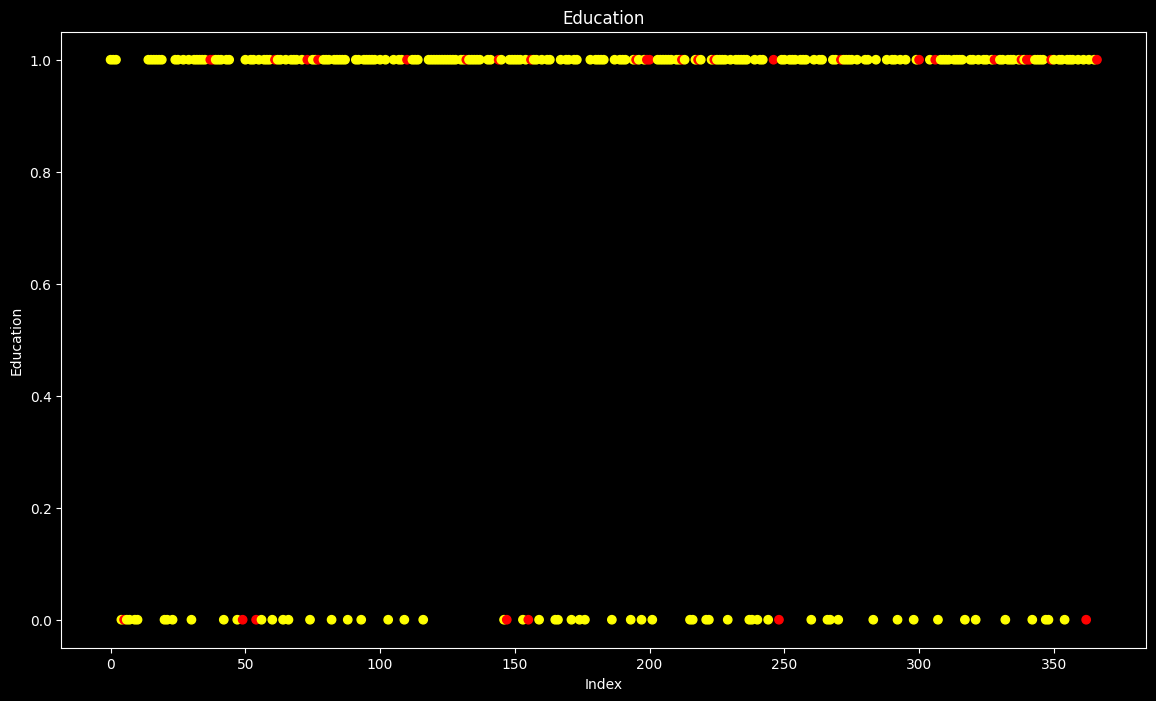

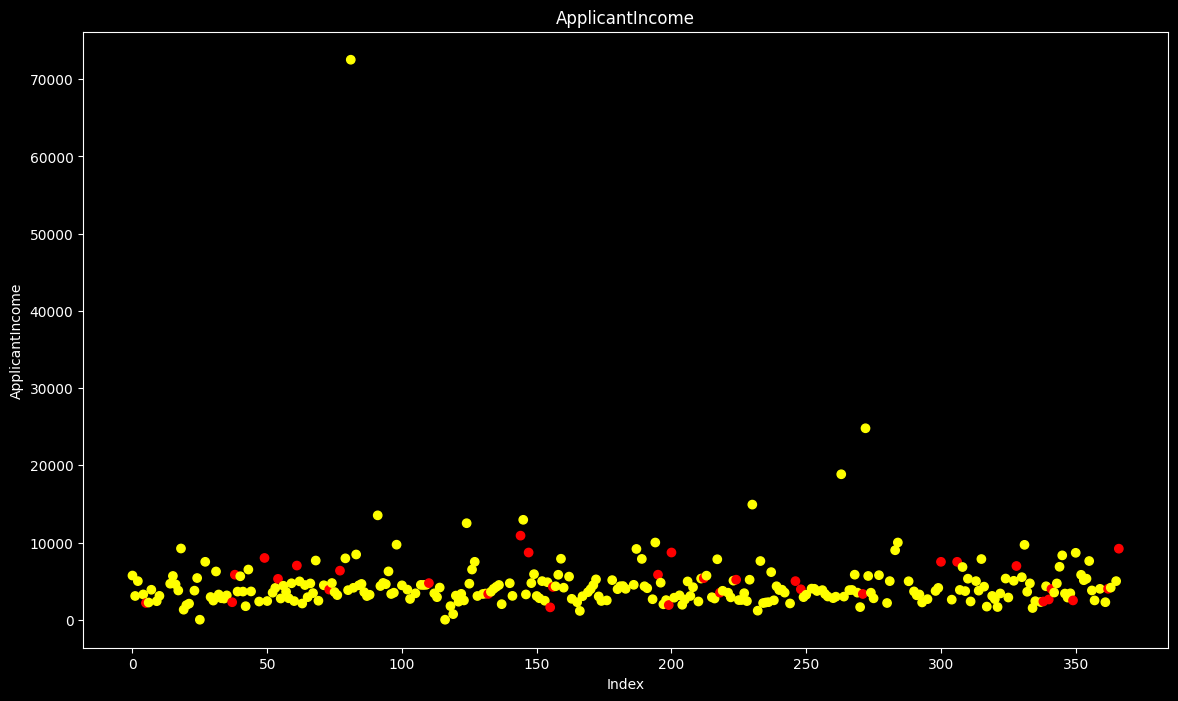

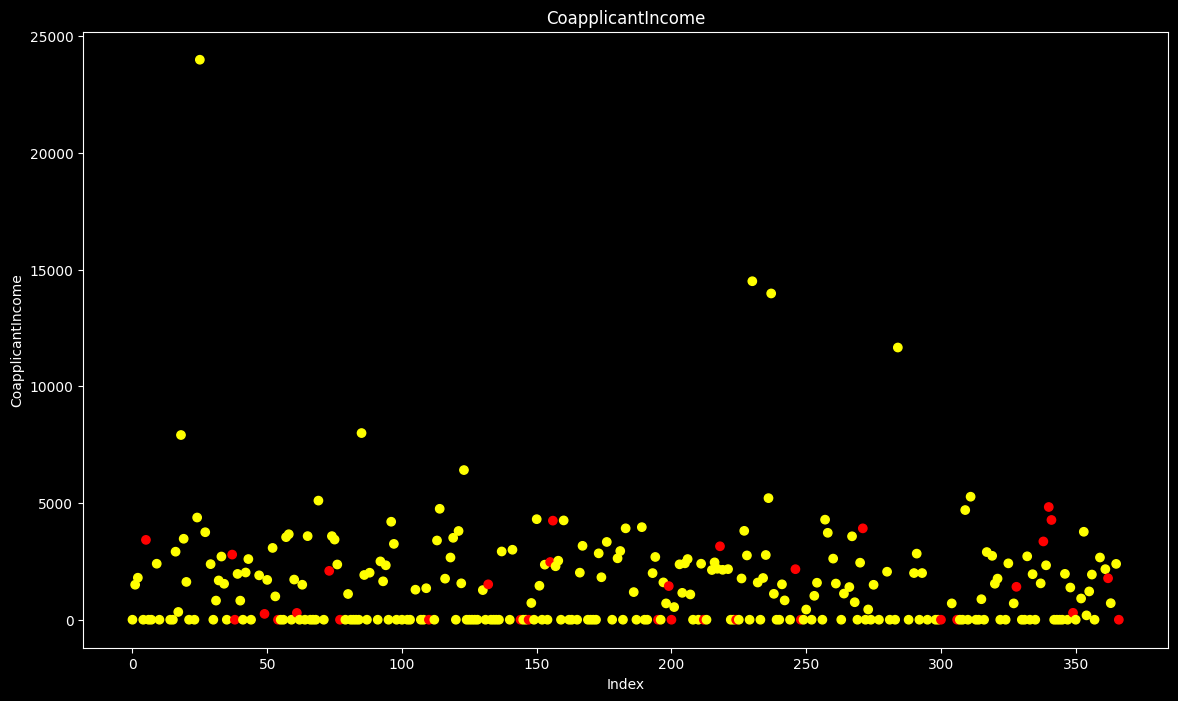

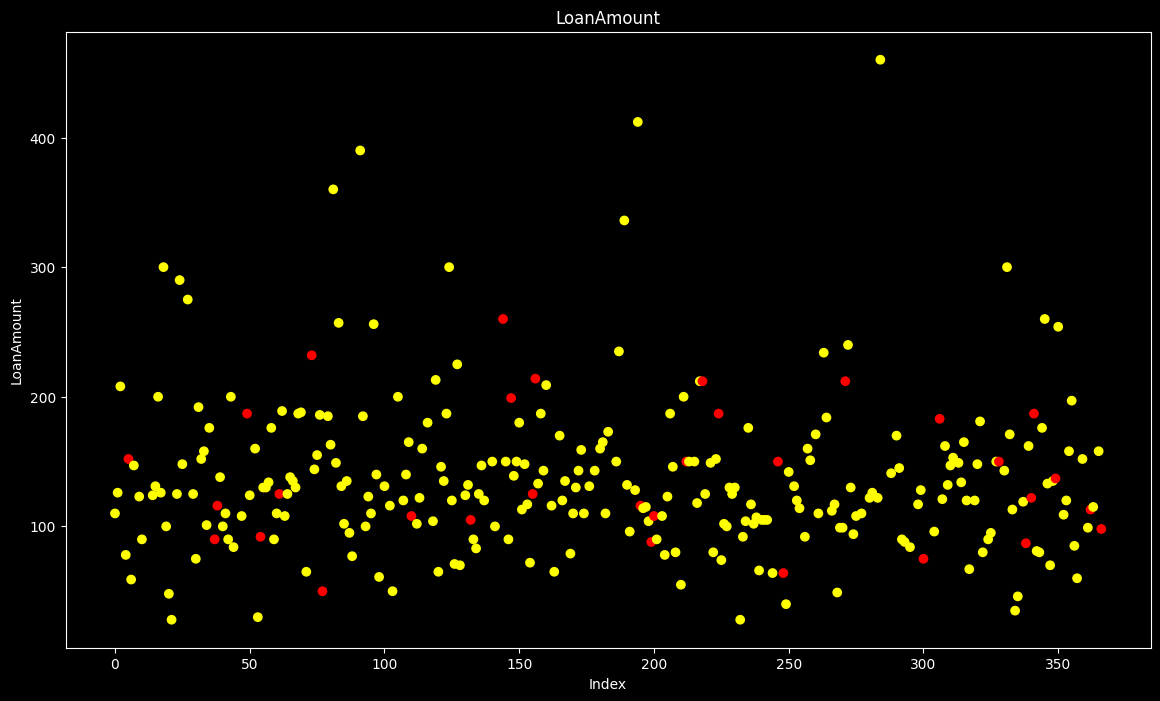

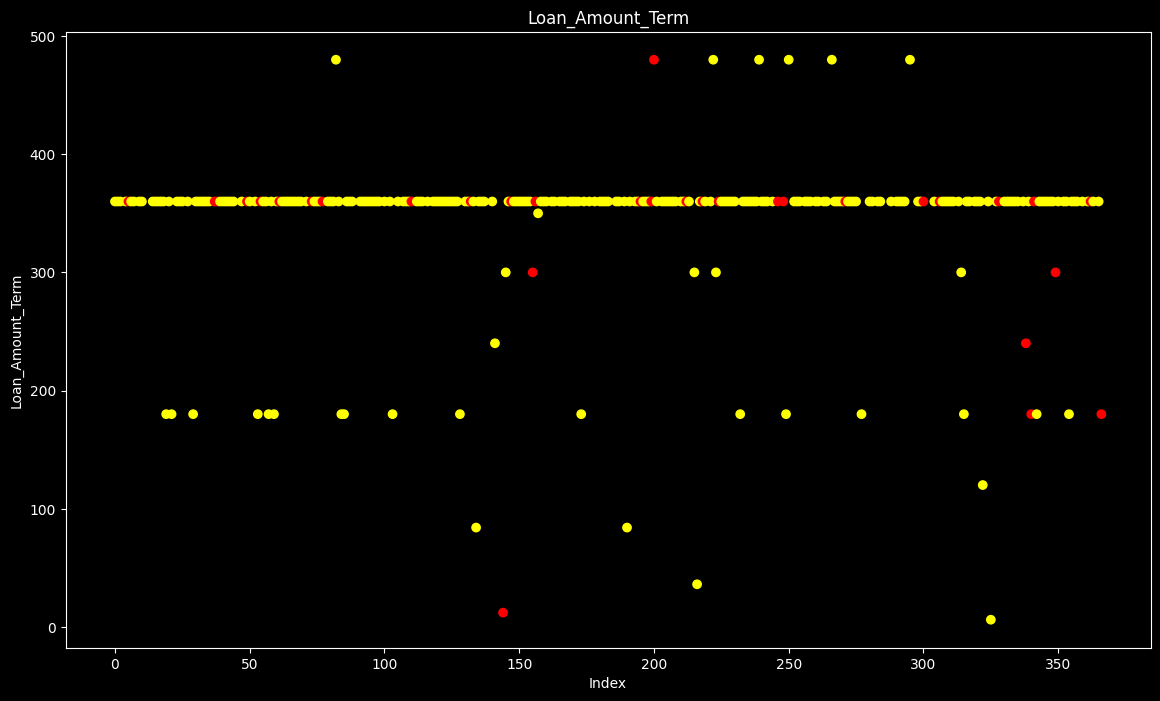

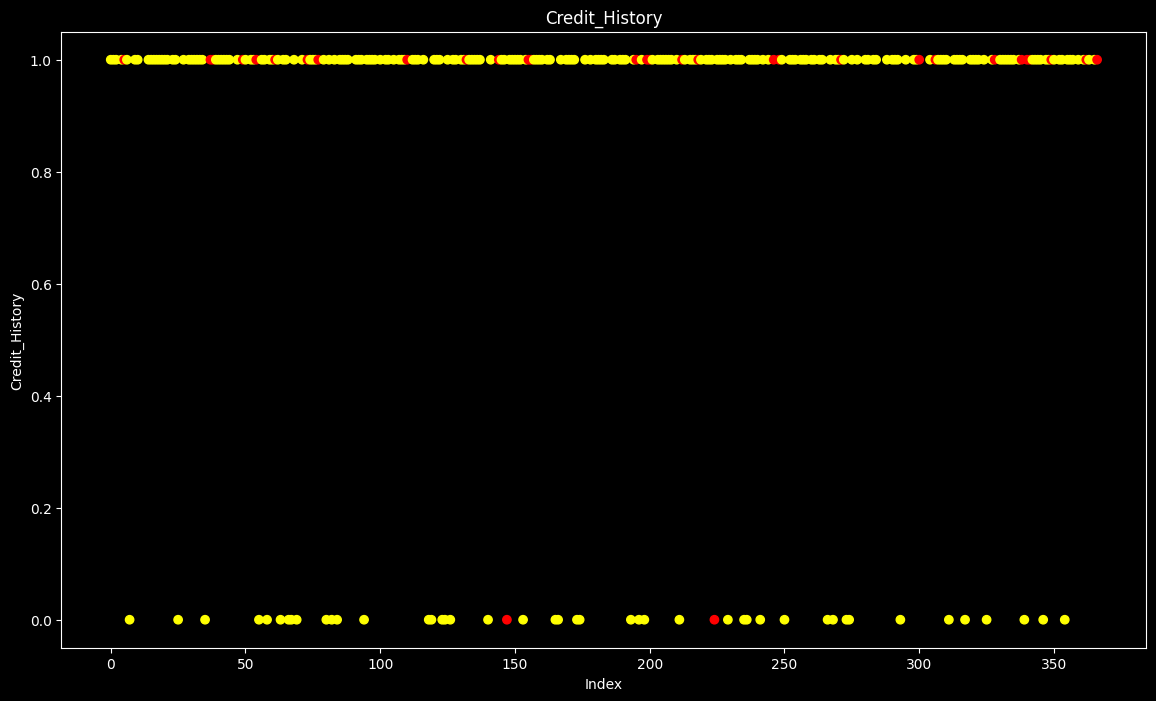

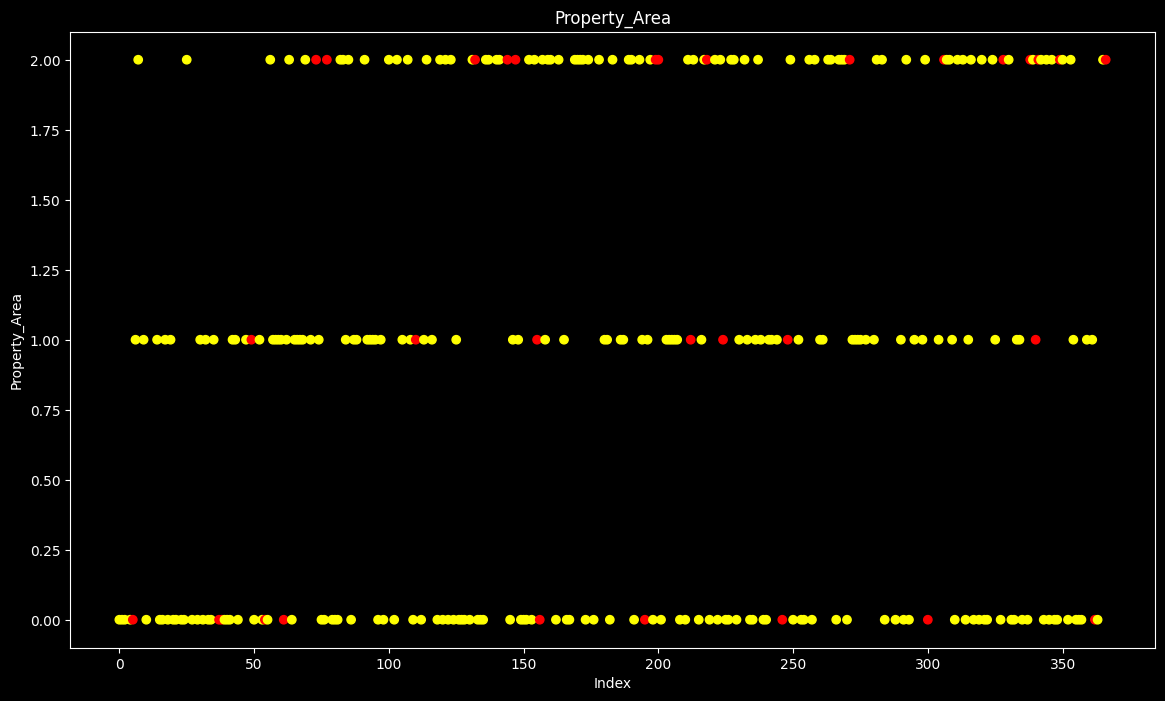

In [158]:
# Λίστα με τα ονόματα όλων των στηλών
all_columns = df.columns.tolist()

# Δημιουργία scatter-plots για κάθε μεταβλητή
for column in all_columns:
    
    if column != "Self_Employed": #Εξαιρούμε τη 'Self_Employed' από τη λίστα των στηλών
        plt.figure(figsize=(14,8))
        colors = np.where(df["Self_Employed"]==1, 'red', 'yellow') #Ορίζουμε τα χρώματα ανάλογα με την τιμή της 'Self_Employed'
        plt.scatter(df.index, df[column], c=colors)
        plt.title(column)
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.show()

<span style="color:blueviolet">Διαγράμμτα Διασποράς με βάση την Κατηγορία της Μεταβλητής 'Self_Employed' για τα διάοφρα ζεύγη μεταβλητών

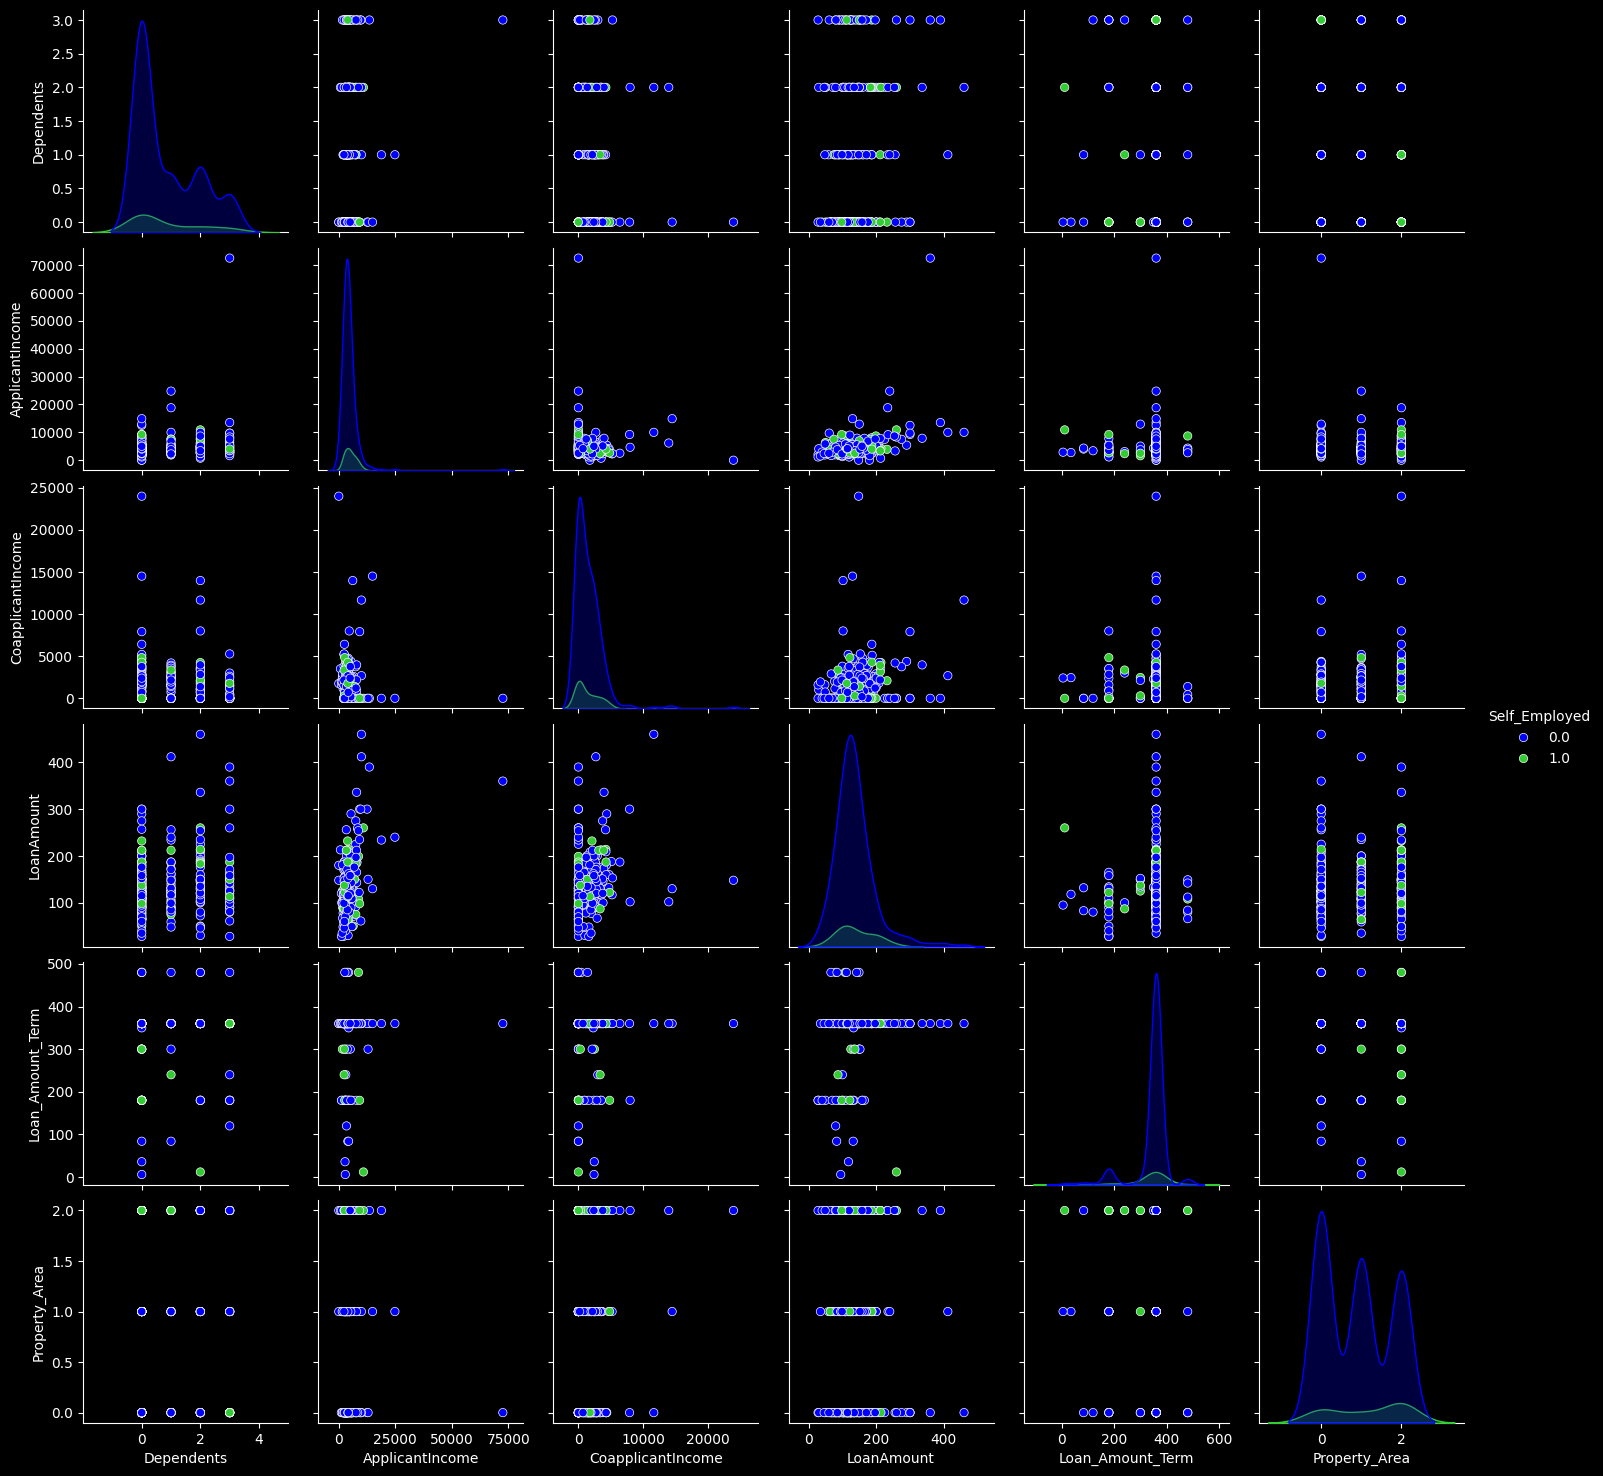

In [159]:
# Αγνοεί όλες τις προειδοποιήσεις που μπορεί να παράγονται κατά την εκτέλεση του κώδικα.
wr.filterwarnings('ignore')

# Δημιουργία διαγράμματος που παρουσιάζει τις σχέσεις μεταξύ όλων των ζευγών μεταβλητών στο DataFrame, με διαφορετικά χρώματα για τις διάφορες κατηγορίες της μεταβλητής 'TenYearCHD'.
sns.pairplot(data=df, hue="Self_Employed", palette=['Blue', 'limegreen']);


<span style="color:blueviolet">Density Plots

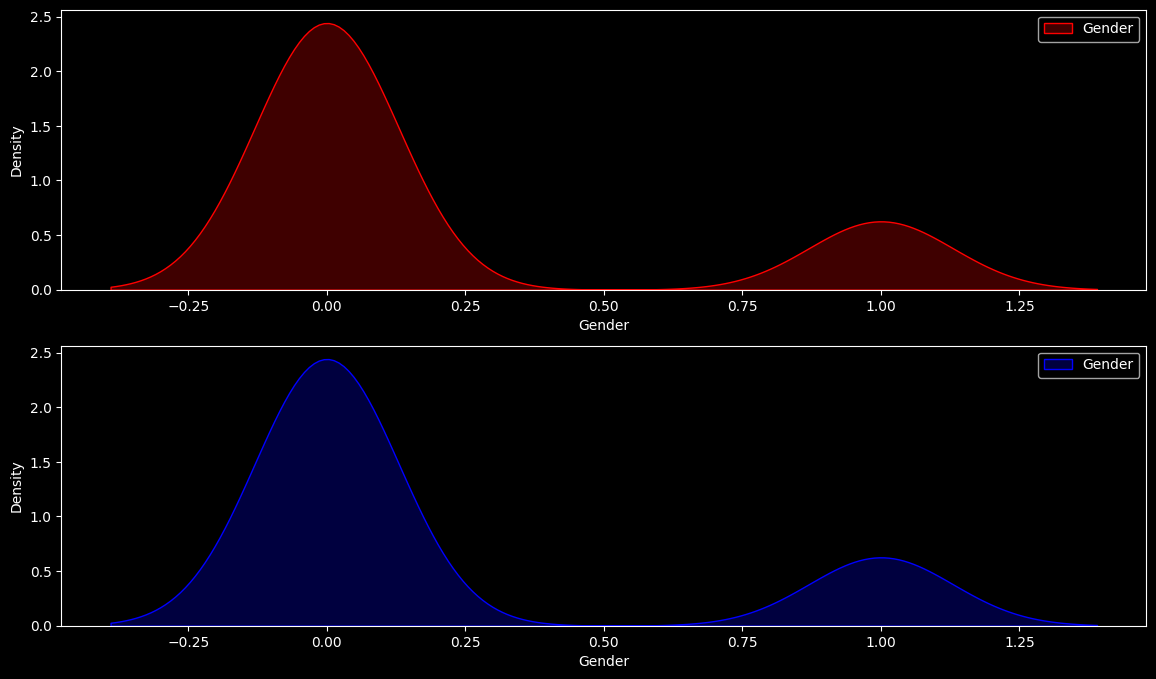

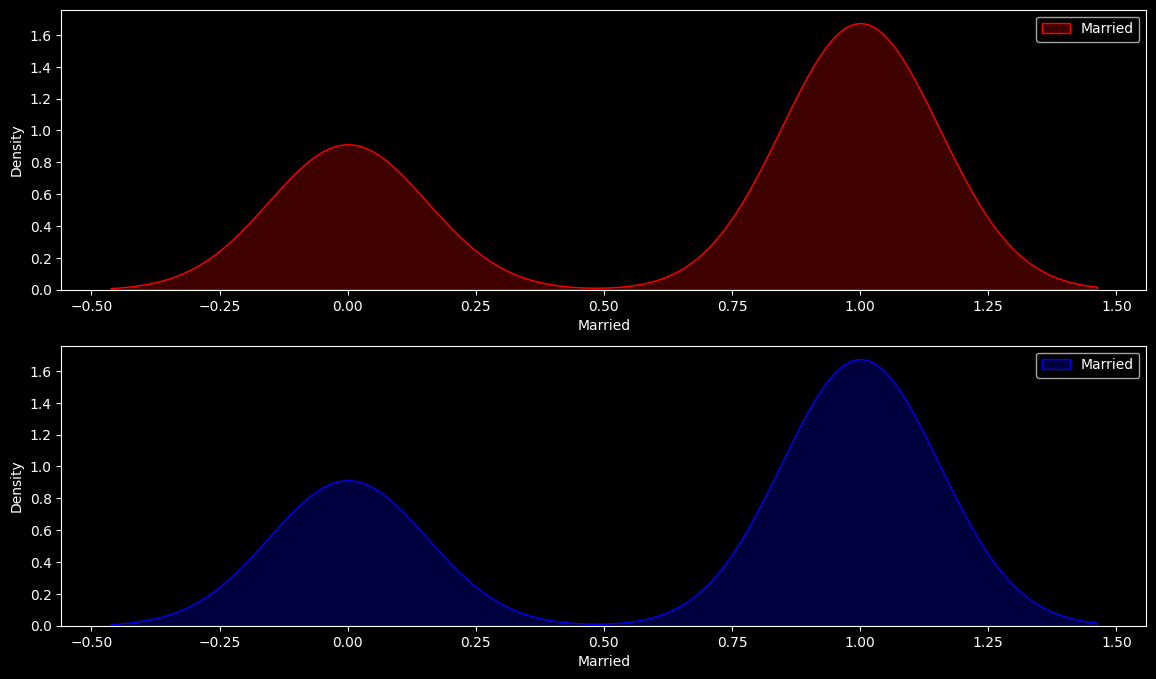

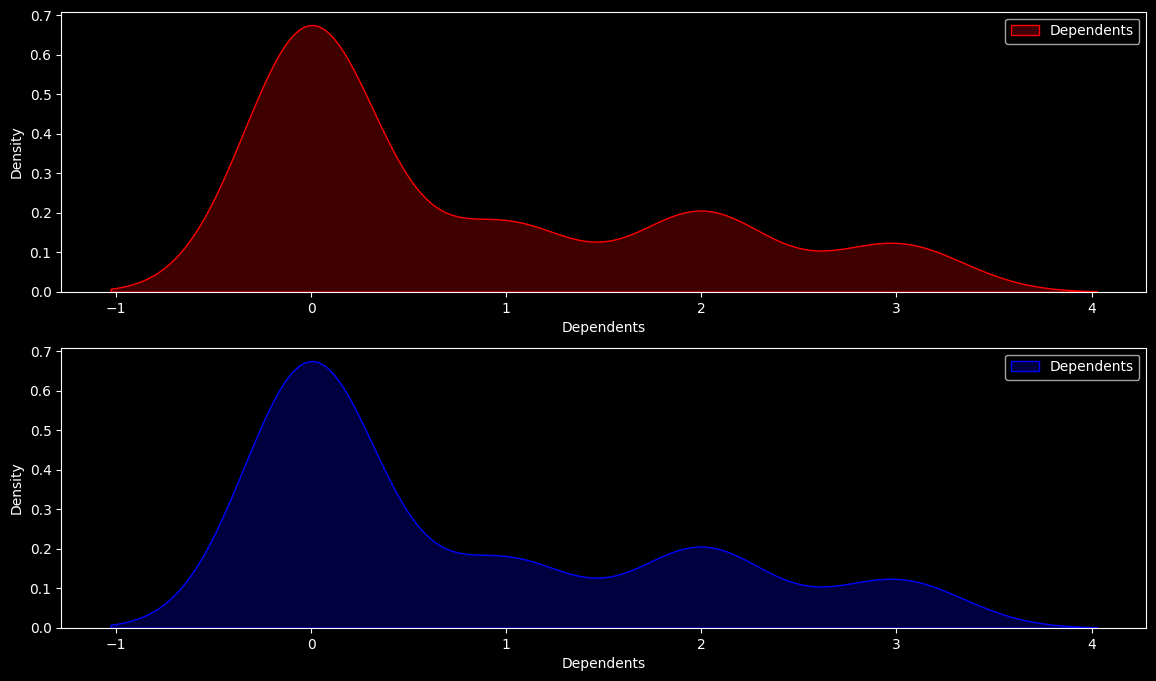

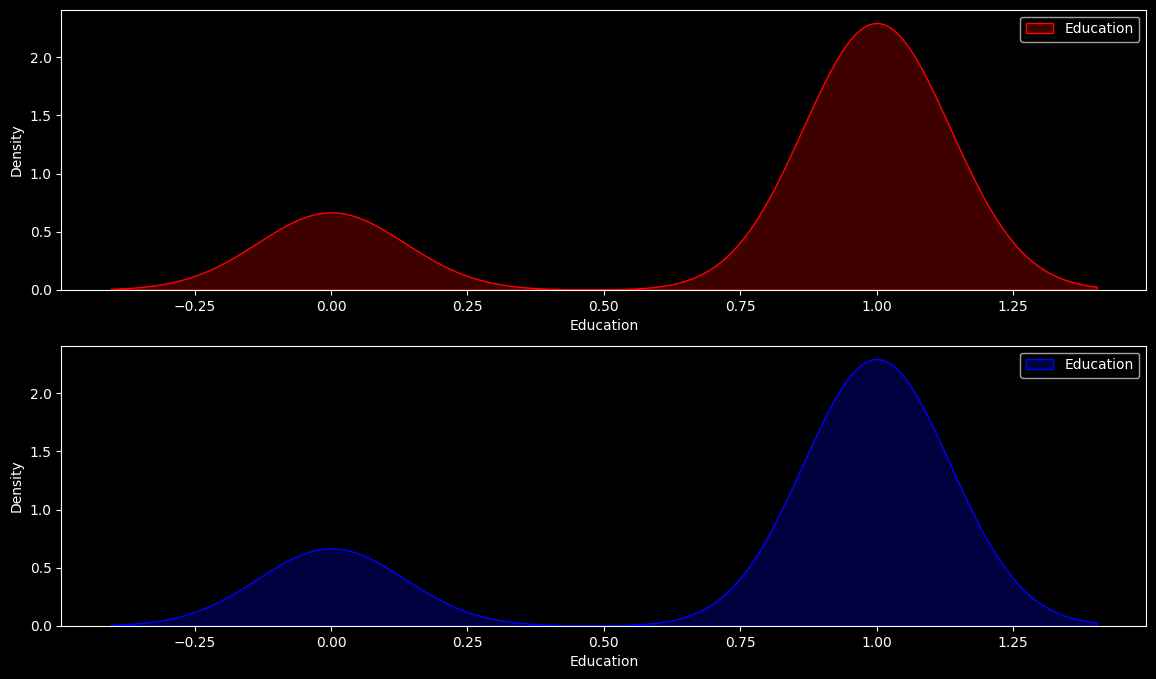

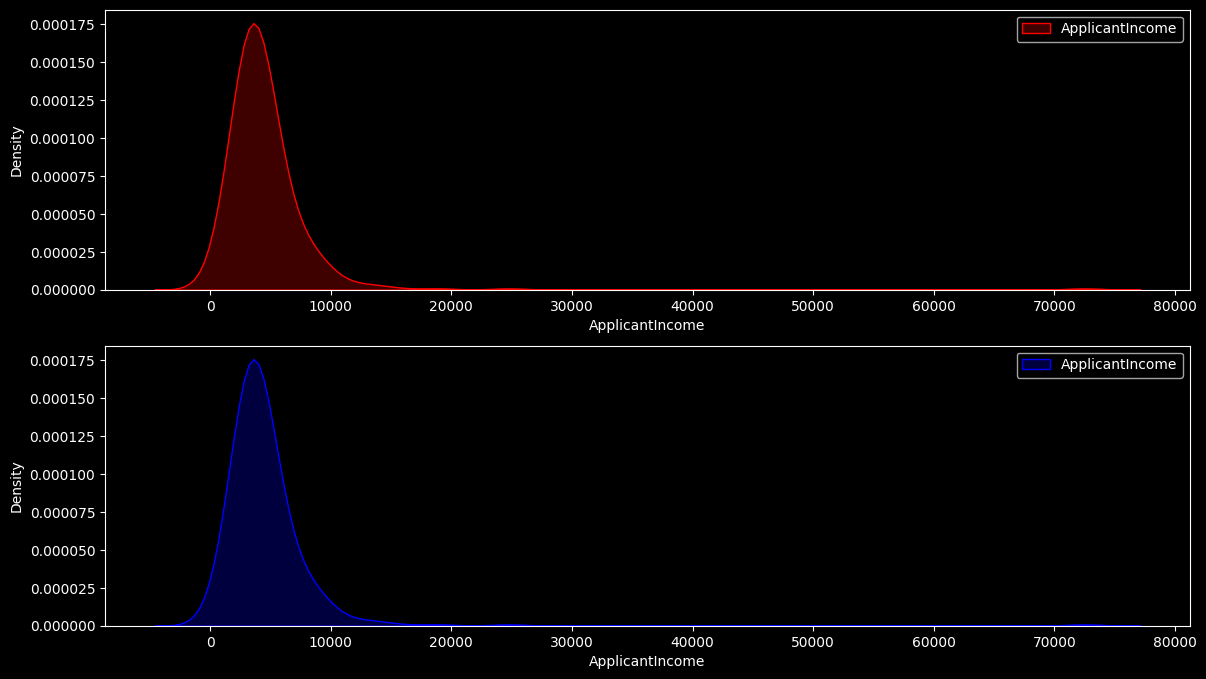

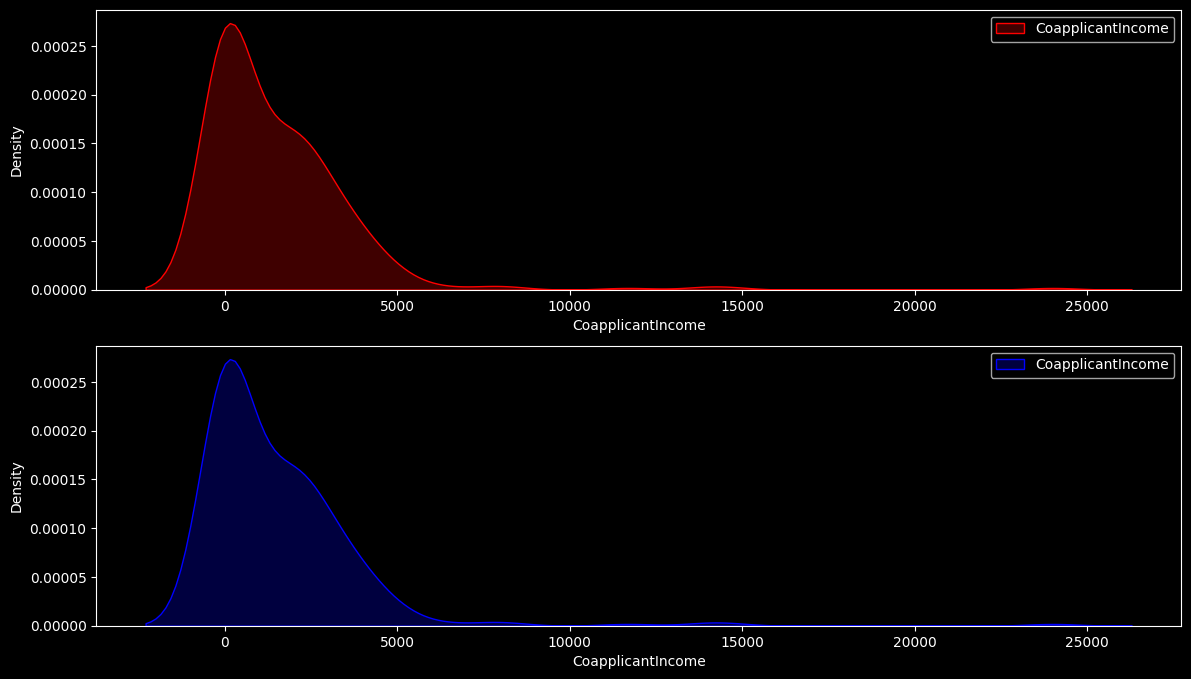

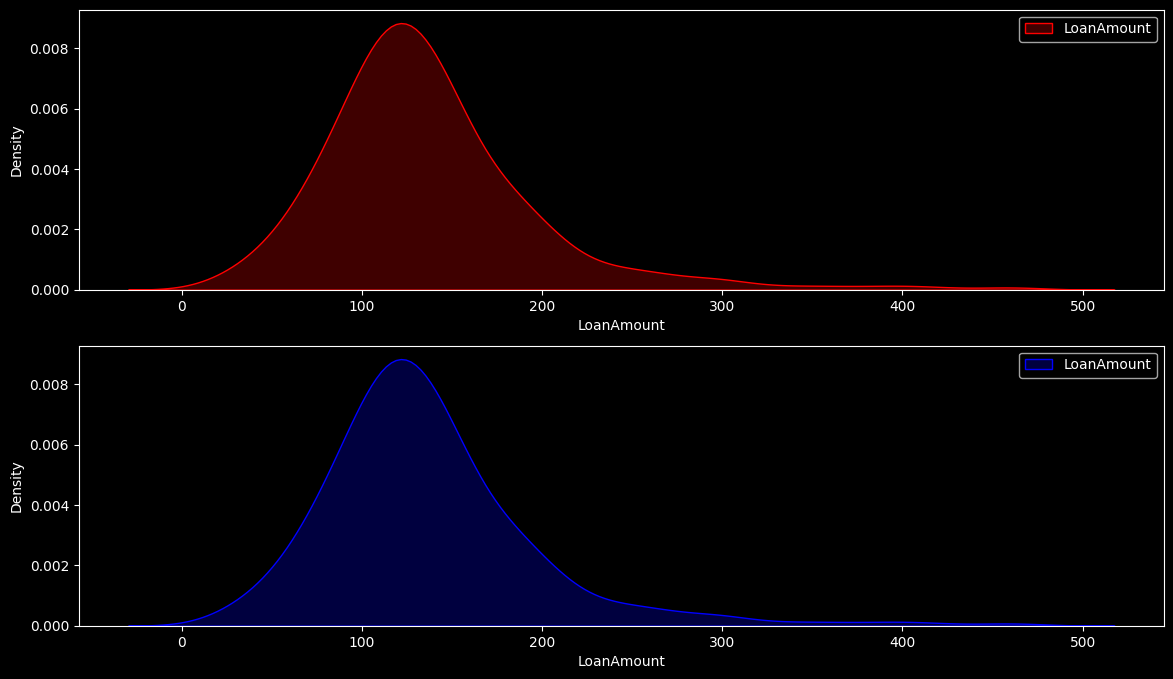

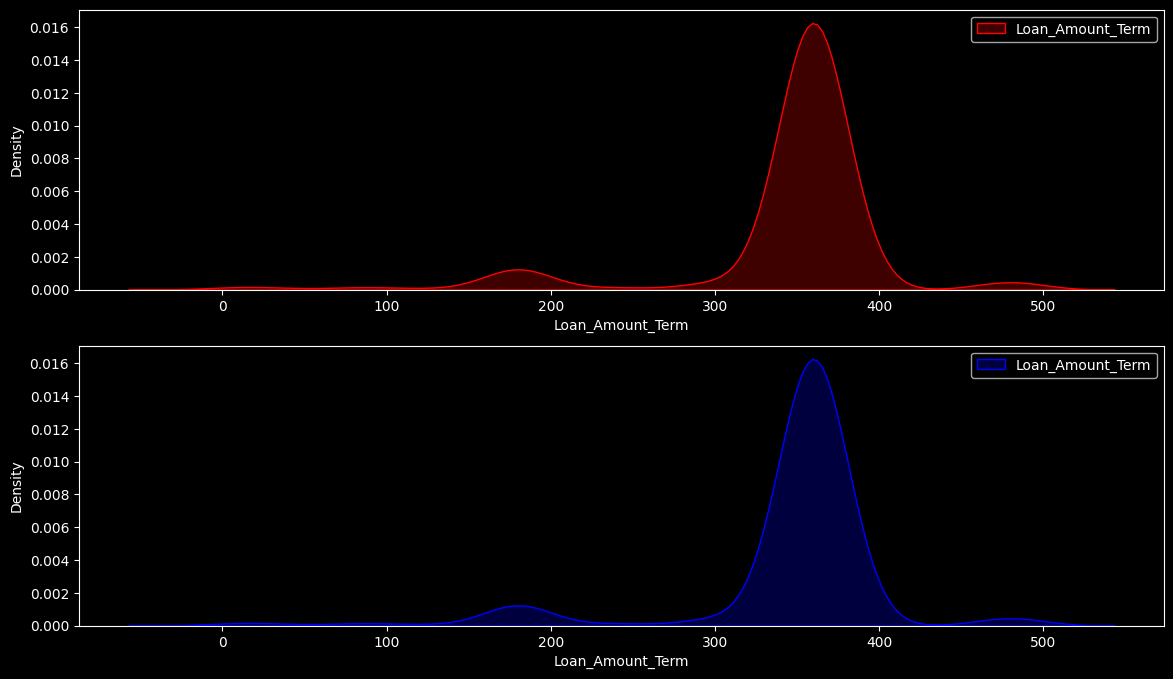

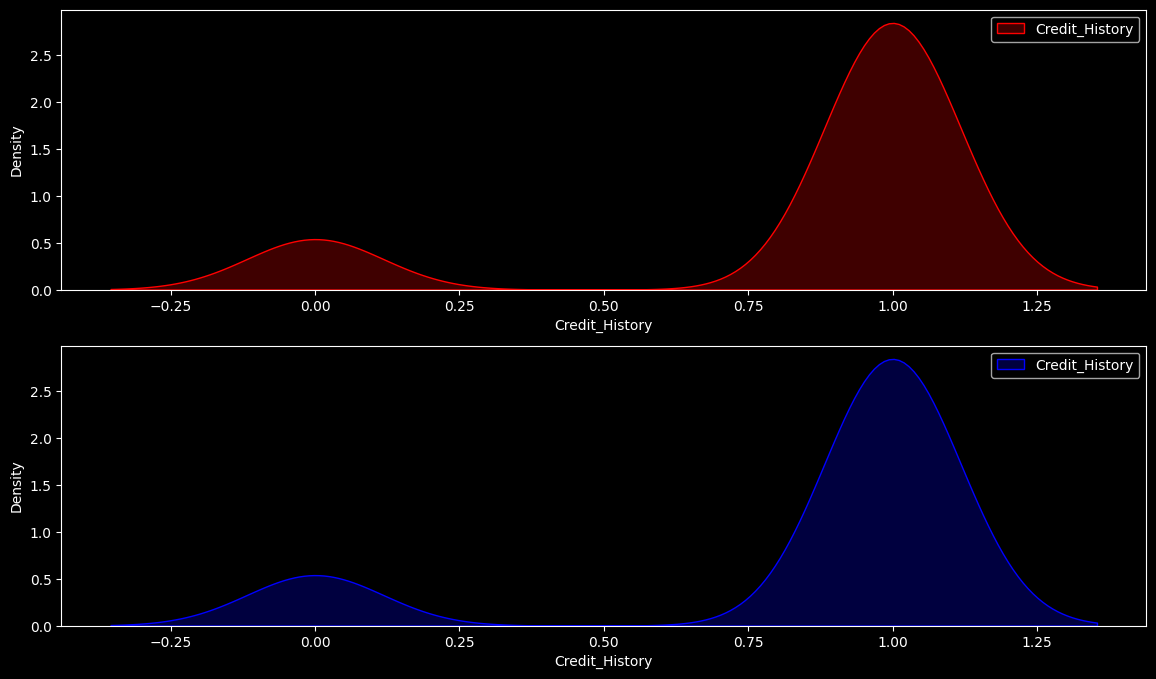

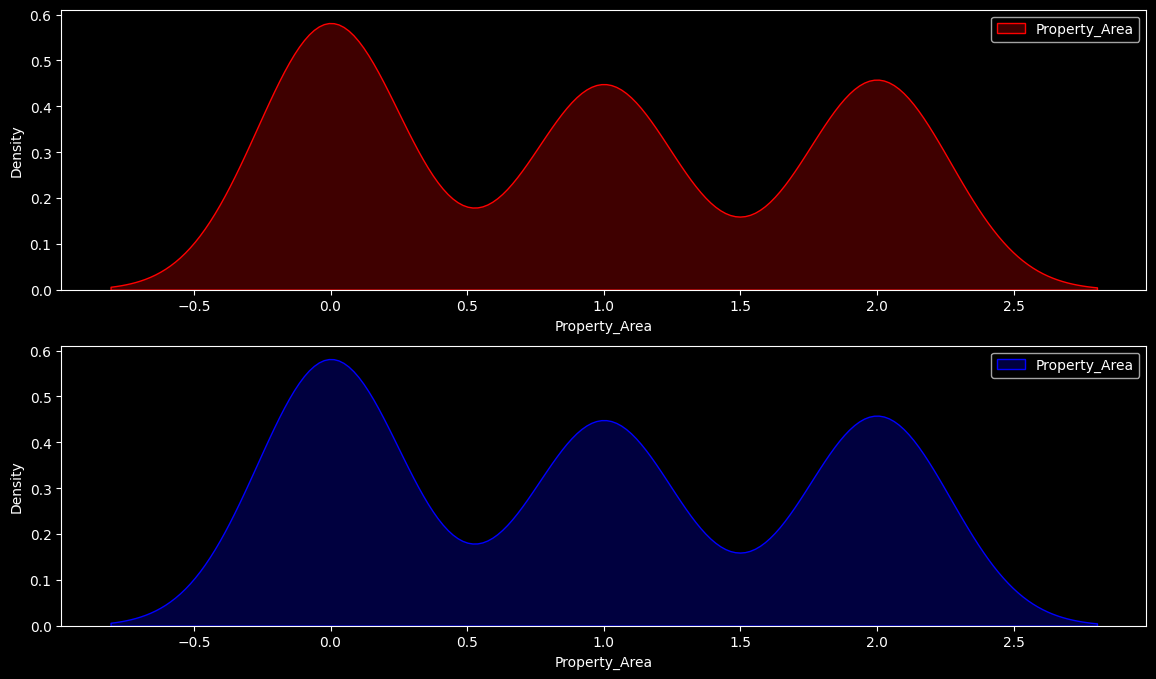

In [160]:
# Λίστα με τα ονόματα όλων των στηλών
all_columns = df.columns.tolist()

# Διατρέχουμε όλες τις στήλες του DataFrame
for column in all_columns:
    # Ελέγχουμε αν η στήλη είναι κατηγορική
    if df[column].dtype.name == 'category':
        # Μετατρέπουμε την κατηγορική στήλη σε αριθμητική
        df[column] = df[column].astype('int')


# Δημιουργία διαγραμμάτων κατανομής για κάθε μεταβλητή
for column in all_columns:
    if column != "Self_Employed":  # Εξαιρούμε τη 'Self_Employed' από τη λίστα των στηλών
        ax1 = plt.subplot(211)
        sns.kdeplot(df[column], color = 'r', fill = True)
        plt.xlabel(column)
        plt.legend([column])

        ax2 = plt.subplot(212)
        sns.kdeplot(df[column], color = 'b', fill = True)
        plt.xlabel(column)
        plt.legend([column])

        plt.show()


# <span style="color:cyan">ΣΥΝΤΕΛΕΣΤΗΣ ΣΥΣΧΕΤΙΣΗΣ

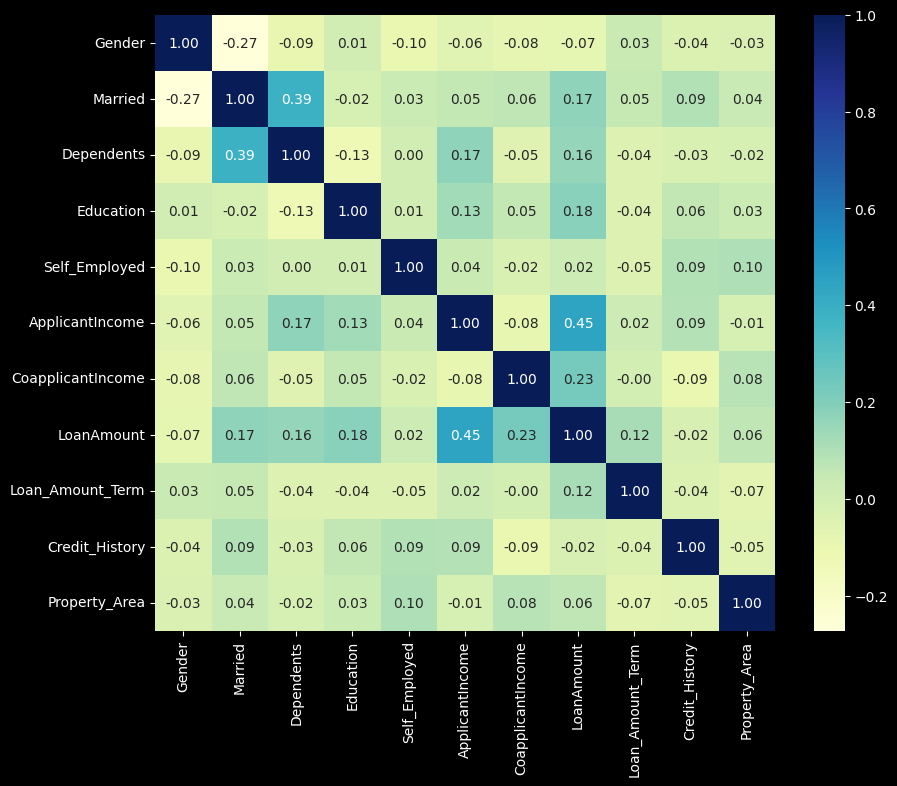

In [161]:
# Υπολογισμός του πίνακα συσχέτισης
corr_matrix = df.corr()

# Δημιουργία ενός heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu')

# Εμφάνιση του heatmap
plt.show()

# <span style="color:cyan">ΣΧΟΛΙΑ ΓΙΑ ΤΗΝ ΕΠΕΞΕΡΓΑΣΙΑ ΚΑΙ ΤΗΝ ΑΝΑΛΥΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

<span style="color:blueviolet">ΠΕΡΙΓΡΑΦΙΚΑ ΣΤΑΤΙΣΤΙΚΑ ΣΤΟΙΧΕΙΑ

<span style="color:blueviolet">Από τα περιγραφικά στατιστικά αξίζει να σημειωθεί ότι το LoanAmount έχει υψηλή τυπική απόκλιση (85.59) σε σχέση με τη μέση τιμή (146.41) υποδηλώνει μεγάλη διασπορά στα ποσά των δανείων. Η παρουσία ακραίων τιμών (μεγ. τιμή 700) μπορεί να επηρεάζει τις αποφάσεις δανειοδότησης και την ανάλυση. Επιπλέον το ApplicantIncome έχει μεγάλη διακύμανση στα εισοδήματα των αιτούντων (μέση τιμή 5403.46, τυπική απόκλιση 6109.06) δείχνει σημαντική ετερογένεια. Η μέγιστη τιμή των 81000 υποδηλώνει την ύπαρξη αιτούντων με εξαιρετικά υψηλά εισοδήματα, κάτι που μπορεί να επηρεάζει τη μέση τιμή και την τυπική απόκλιση. Τέλος το CoapplicantIncome παρόμοια με το εισόδημα των αιτούντων, το εισόδημα των εγγυητών παρουσιάζει μεγάλη διακύμανση (μέση τιμή 1621.24, τυπική απόκλιση 2926.24). Η μέγιστη τιμή των 41667 δείχνει την παρουσία συναιτούντων με πολύ υψηλά εισοδήματα.

<span style="color:blueviolet">ΙΣΤΟΓΡΑΜΜΑΤΑ

<span style="color:blueviolet">Από τα Ιστογράμματα παρατηρείτε ότι για το LoanAmount οι περισσότεροι αιτούντες ζητούν μικρά ποσά δανείων. Η κατανομή παρουσιάζει ουρά προς τα δεξιά, υποδεικνύοντας ότι υπάρχουν λίγοι αιτούντες που ζητούν μεγάλα ποσά. Σχετικά με το ApplicantIncome η κατανομή του εισοδήματος των αιτούντων παρουσιάζει ουρά προς τα δεξιά, δείχνοντας ότι η πλειοψηφία έχει χαμηλά εισοδήματα, με κάποιους να έχουν πολύ υψηλά εισοδήματα. Τέλος με το Education και το Gender σημειώνεται ότι οι περισσότεροι αιτούντες είναι άνδρες και απόφοιτοι πανεπιστημίου. Αυτό μπορεί να υποδηλώνει ότι αυτές οι ομάδες είναι πιο πιθανό να αιτηθούν δάνειο ή να εγκριθούν.


<span style="color:blueviolet">ΔΙΑΓΡΑΜΜΑΤΑ ΔΙΑΣΠΟΡΑΣ

<span style="color:blueviolet">Από τα Διαγράμματα Διασποράς παρατηρείτε ότι για το LoanAmount και το ApplicantIncome δεν υπάρχει σαφής γραμμική σχέση μεταξύ του ποσού του δανείου και του εισοδήματος των αιτούντων. Αυτό δείχνει ότι η απόφαση για το ποσό του δανείου δεν βασίζεται αποκλειστικά στο εισόδημα. Παρόμοια παρατήρηση με το εισόδημα των εγγυητών (CoapplicantIncome), δεν υπάρχει σαφής γραμμική σχέση με το ποσό του δανείου.


<span style="color:blueviolet">ΠΙΝΑΚΑΣ ΣΥΣΧΕΤΙΣΗΣ

<span style="color:blueviolet">Από τον Πίνακα συσχέτισης σχετικά με το LoanAmount και το ApplicantIncome, υπάρχει μέτρια θετική συσχέτιση (περίπου 0.57), δείχνοντας ότι οι αιτούντες με υψηλότερα εισοδήματα τείνουν να ζητούν μεγαλύτερα δάνεια. Ωστόσο, αυτή η συσχέτιση δεν είναι τόσο ισχυρή για να θεωρηθεί αποφασιστικός παράγοντας. Δεν υπάρχει ισχυρή συσχέτιση με το LoanAmount, υποδηλώνοντας ότι το εισόδημα του εγγυητή δεν επηρεάζει σημαντικά το ποσό του δανείου.


<span style="color:blueviolet">ΣΥΜΠΕΡΑΣΜΑ

<span style="color:blueviolet">Το dataset παρουσιάζει μεγάλη ποικιλία στα χαρακτηριστικά των αιτούντων δάνειο, με σημαντικές διακυμάνσεις και παρουσία ακραίων τιμών. Οι συσχετίσεις δείχνουν ότι υπάρχουν και άλλοι παράγοντες πέρα από το εισόδημα που επηρεάζουν τις αποφάσεις δανειοδότησης. Αυτό είναι σημαντικό για την κατανόηση των δεδομένων και την ανάπτυξη ακριβών μοντέλων πρόβλεψης.


# <span style="color:cyan">ΜΕΘΟΔΟΣ ΚΝΝ

<span style="color:blueviolet">Μοντέλο K-Nearest Neighbors (KNN) 

In [162]:
# Εκτυπώνει τις πρώτες 10 γραμμές του DataFrame
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0.0,1,0,5720,0,110.0,360.0,1,0
1,0,1,1.0,1,0,3076,1500,126.0,360.0,1,0
2,0,1,2.0,1,0,5000,1800,208.0,360.0,1,0
4,0,0,0.0,0,0,3276,0,78.0,360.0,1,0
5,0,1,0.0,0,1,2165,3422,152.0,360.0,1,0
6,1,0,1.0,0,0,2226,0,59.0,360.0,1,1
7,0,1,2.0,0,0,3881,0,147.0,360.0,0,2
9,0,0,0.0,0,0,2400,2400,123.0,360.0,1,1
10,0,0,0.0,0,0,3091,0,90.0,360.0,1,0
14,1,0,0.0,1,0,4666,0,124.0,360.0,1,1


In [163]:
# Χρησιμοποιούμε όλες τις στήλες εκτός από την τελευταία ως χαρακτηριστικά
X = df.drop('Self_Employed', axis=1)

# Εκτυπώνει τις πρώτες 5 γραμμές του πίνακα X
X.sample(5)

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
250,0,1,3.0,1,3242,437,142.0,480.0,0,0
199,0,1,0.0,1,1900,1442,88.0,360.0,1,2
32,0,0,0.0,1,3268,1683,152.0,360.0,1,1
189,0,1,2.0,1,7874,3967,336.0,360.0,1,2
325,0,0,0.0,1,2875,2416,95.0,6.0,0,1


In [164]:
# Χρησιμοποιούμε τη στήλη 'Self_Employed' ως τη μεταβλητή πρόβλεψης
y = df['Self_Employed']

# Εκτυπώνει τις πρώτες 5 γραμμές του πίνακα y
y.sample(5)

235    0
304    0
6      0
203    0
35     0
Name: Self_Employed, dtype: int32

In [165]:
# Αυτές οι εντολές κανονικοποιούν τα δεδομένα, μετατρέποντάς τα σε μια κλίμακα μεταξύ -1 και 1, και στη συνέχεια σε μια κλίμακα μεταξύ 0 και 1.
X = StandardScaler().fit_transform(X.astype(float))
X = MaxAbsScaler().fit_transform(X.astype(float))  
X = MinMaxScaler().fit_transform(X.astype(float))  

# Εμφάνιση των πρώτων 5 γραμμών του κανονικοποιημένου πίνακα X
print(X[:1])

NameError: name 'StandardScaler' is not defined

In [166]:
# Εκτυπώνει το εύρος των τιμών του πίνακα X
(X.max() - X.min())

Gender                   1.0
Married                  1.0
Dependents               3.0
Education                1.0
ApplicantIncome      72529.0
CoapplicantIncome    24000.0
LoanAmount             432.0
Loan_Amount_Term       474.0
Credit_History           1.0
Property_Area            2.0
dtype: float64

In [167]:
# Διαχωρισμός των δεδομένων σε σύνολο εκπαίδευσης και σύνολο δοκιμής
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

NameError: name 'train_test_split' is not defined

In [168]:
# Δημιουργία του ταξινομητή KNN
knn = KNeighborsClassifier(n_neighbors=5)

NameError: name 'KNeighborsClassifier' is not defined

In [169]:
# Εκπαίδευση του ταξινομητή
knn.fit(X_train, y_train)

NameError: name 'knn' is not defined

In [170]:
# Πρόβλεψη των τιμών για τα δεδομένα δοκιμής
y_pred = knn.predict(X_test)

NameError: name 'knn' is not defined

In [171]:
# Υπολογισμός της ακρίβειας
accuracy = accuracy_score(y_test, y_pred)

NameError: name 'accuracy_score' is not defined

In [172]:
#Εκτυπώνει την ακρίβεια του μοντέλου
print(f"Η ακρίβεια του μοντέλου KNN είναι {accuracy*100:.2f}%")

NameError: name 'accuracy' is not defined

<span style="color:blueviolet">Ένταξη μιας νέας παρατήρησης στο μοντέλο KNN για την πρόβλεψη της κλάσης της

In [173]:
# Δημιουργία DataFrame χωρίς τη στήλη 'Self_Employed'
df_without_target = df.drop(columns=['Self_Employed'])

# Δημιουργία του ταξινομητή KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Εκπαίδευση του ταξινομητή
knn.fit(X_train, y_train)

# Δημιουργία μιας νέας τυχαίας γραμμής με ακέραιες τιμές
new_row = []
for column in df_without_target.columns:
    min_val = int(df_without_target[column].min())
    max_val = int(df_without_target[column].max())
    new_row.append(np.random.randint(min_val, max_val+1))

# Μετατροπή της νέας παρατήρησης σε 2D πίνακα
new_observation = np.array(new_row).reshape(1, -1)

# Προ-επεξεργασία της νέας παρατήρησης
new_observation = StandardScaler().fit_transform(new_observation)
new_observation = MaxAbsScaler().fit_transform(new_observation)
new_observation = MinMaxScaler().fit_transform(new_observation)

# Πρόβλεψη της κλάσης της νέας παρατήρησης
prediction = knn.predict(new_observation)

print(f"Η νέα παρατήρηση είναι {new_row}")
print(f"Η πρόβλεψη για τη νέα παρατήρηση είναι {prediction}")

NameError: name 'KNeighborsClassifier' is not defined

<span style="color:blueviolet">Πιθανότητες κάθε κλάσης για κάθε δείγμα και εισαγωγή σε ένα DataFrame

In [174]:
# Λαμβάνουμε τις προβλεπόμενες πιθανότητες για κάθε δείγμα
probabilities = knn.predict_proba(X)

# Βρίσκουμε τους δείκτες των δειγμάτων όπου η μέγιστη πιθανότητα δεν είναι 1
indices = np.where(np.max(probabilities, axis=1) != 1)

# Εκτυπώνουμε αυτά τα δείγματα και τις αντίστοιχες πιθανότητες τους
for i in indices[0]:
    print(f"Sample {i}:")
    print(X[i])
    print(f"Predicted probabilities: {probabilities[i]}")
    print("\n")

NameError: name 'knn' is not defined

<span style="color:blueviolet">Πιθανότητες κάθε κλάσης για κάθε δείγμα σε έναν πίνακα αποτελεσμάτων

In [175]:
# Επιλέγουμε όλα τα χαρακτηριστικά εκτός από το τελευταίο για το X και το τελευταίο για το y
X = df.iloc[:, :-1].values
y = df['Self_Employed'].values

# Λαμβάνουμε τις προβλεπόμενες πιθανότητες για κάθε δείγμα
probabilities = knn.predict_proba(X)

# Βρίσκουμε τους δείκτες των δειγμάτων όπου η μέγιστη πιθανότητα δεν είναι 1
indices = np.where(np.max(probabilities, axis=1) != 1)

# Αρχικοποιούμε ένα κενό DataFrame για να αποθηκεύσουμε τα αποτελέσματα και αποκλείουμε τη στήλη στόχου 'Self_Employed' από τις στήλες
results_df = pd.DataFrame(columns=["Sample"] + list(df.drop(columns=['Self_Employed']).columns) + ["Predicted Probabilities"])

# Επαναλαμβάνουμε για κάθε δείκτη
for i in indices[0]:
    # Προσθέτουμε τον δείκτη του δείγματος, τα χαρακτηριστικά και τις προβλεπόμενες πιθανότητες στο DataFrame
    results_df.loc[len(results_df)] = [i] + list(X[i]) + [probabilities[i]]

# Εκτυπώνουμε το DataFrame αποτελεσμάτων
print(results_df)

NameError: name 'knn' is not defined

<span style="color:blueviolet">Υπολογισμός και Εκτύπωση Μετρικών Απόδοσης του Μοντέλου KNN

In [176]:
# Πρόβλεψη των τιμών για τα δεδομένα δοκιμής
y_pred = knn.predict(X_test)

# Υπολογισμός της ακρίβειας
accuracy = accuracy_score(y_test, y_pred)
print(f"Ακρίβεια: {accuracy*100:.2f}%")

# Υπολογισμός της ανάκλησης
recall = recall_score(y_test, y_pred)
print(f"Ανάκληση: {recall*100:.2f}%")

# Υπολογισμός της ακρίβειας F1
f1 = f1_score(y_test, y_pred)
print(f"Ακρίβεια F1: {f1*100:.2f}%")

# Υπολογισμός της περιοχής κάτω από την καμπύλη ROC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Περιοχή κάτω από την καμπύλη ROC: {roc_auc*100:.2f}%")

NameError: name 'knn' is not defined

<span style="color:blueviolet">Βέλτιστη Τιμή K για τον Ταξινομητή KNN μέσω Επαναληπτικής Δοκιμής

In [177]:
# Διαχωρισμός των δεδομένων σε σύνολο εκπαίδευσης και σύνολο δοκιμής
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Δημιουργία λίστας για την αποθήκευση των ακριβειών
accuracies = []

# Δοκιμή διάφορων τιμών του K
for k in range(1, 21):
    # Δημιουργία του ταξινομητή KNN
    knn = KNeighborsClassifier(n_neighbors=k)

    # Εκπαίδευση του ταξινομητή
    knn.fit(X_train, y_train)

    # Πρόβλεψη των τιμών για τα δεδομένα δοκιμής
    y_pred = knn.predict(X_test)

    # Υπολογισμός της ακρίβειας
    accuracy = accuracy_score(y_test, y_pred)

    # Προσθήκη της ακρίβειας στη λίστα
    accuracies.append(accuracy)

# Εμφάνιση όλων των ακριβειών
for i, accuracy in enumerate(accuracies, start=1):
    print(f"Ακρίβεια για K={i}: {accuracy*100:.2f}%")

# Εύρεση της τιμής του K που δίνει την καλύτερη ακρίβεια
best_k = accuracies.index(max(accuracies)) + 1
print(f"\nΗ καλύτερη τιμή για το K είναι {best_k} με ακρίβεια {max(accuracies)*100:.2f}%")

NameError: name 'train_test_split' is not defined

# <span style="color:cyan">ΔΙΑΓΡΑΜΜΑΤΑ ΜΕΘΟΔΟΥ ΚΝΝ

 <span style="color:blueviolet">Confusion Matrix

In [178]:
# Πρόβλεψη των τιμών για τα δεδομένα δοκιμής
y_pred = knn.predict(X_test)

# Δημιουργία του confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Εμφάνιση του confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

NameError: name 'knn' is not defined

<span style="color:blueviolet">Οπτικοποίηση Ακρίβειας Μοντέλου KNN για Διάφορες Τιμές Κ

In [179]:
# Δημιουργία λίστας για την αποθήκευση των ακριβειών
accuracies = []

# Δοκιμή διάφορων τιμών του K
for k in range(1, 21):
    # Δημιουργία του ταξινομητή KNN
    knn = KNeighborsClassifier(n_neighbors=k)

    # Εκπαίδευση του ταξινομητή
    knn.fit(X_train, y_train)

    # Πρόβλεψη των τιμών για τα δεδομένα δοκιμής
    y_pred = knn.predict(X_test)

    # Υπολογισμός της ακρίβειας
    accuracy = accuracy_score(y_test, y_pred)

    # Προσθήκη της ακρίβειας στη λίστα
    accuracies.append(accuracy)

# Υποθέτοντας ότι η λίστα 'neighbors' περιέχει τις τιμές του K και η λίστα 'accuracies' τις αντίστοιχες ακρίβειες
neighbors = list(range(1, 21))  # Αυτό έχει ήδη τις πραγματικές τιμές του K
accuracies = accuracies  # Αυτό έχει ήδη τις πραγματικές τιμές της ακρίβειας

plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.xticks(neighbors)
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

# Προσθήκη μαύρου grid
plt.grid(color='black')

plt.show()

NameError: name 'KNeighborsClassifier' is not defined

In [180]:
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.show()

NameError: name 'neighbors' is not defined

<span style="color:blueviolet">Οπτικοποίηση Ορίων Απόφασης του Ταξινομητή KNN με Τυχαία Χαρακτηριστικά

In [181]:
# Λίστα με τα ονόματα όλων των στηλών εκτός από τη 'Self_Employed'
feature_columns = df.columns[:-1].tolist()

# Δημιουργία όλων των πιθανών συνδυασμών των χαρακτηριστικών
feature_combinations = list(combinations(feature_columns, 2))

# Επιλογή τυχαία ενός συνδυασμού
combination = random.choice(feature_combinations)

# Επιλέξτε τα δύο χαρακτηριστικά
X = df[list(combination)].values
y = df['Self_Employed'].values

h = 0.5  

# Δημιουργία ενός instance του KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Εκπαίδευση του μοντέλου με τα δεδομένα εκπαίδευσης
knn.fit(X, y)

# Δημιουργία color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Σχεδίαση των ορίων απόφασης. Για αυτό, θα αναθέσουμε ένα χρώμα σε κάθε σημείο στο πλέγμα [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Τοποθέτηση του αποτελέσματος σε ένα χρωματικό διάγραμμα
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Σχεδίαση των training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (k = 5, features = {combination})")

plt.show()

NameError: name 'KNeighborsClassifier' is not defined

# <span style="color:cyan">ΜΕΘΟΔΟΣ ΚΝΝ ΓΙΑ ΤΗΝ ΠΡΟΒΛΕΨΗ ΤΗΣ ΠΙΘΑΝΟΤΗΤΑΣ

<span style="color:blueviolet">Μοντέλο K-Nearest Neighbors (KNN) 

In [182]:
# Εκτυπώνει τις πρώτες 10 γραμμές του DataFrame
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0.0,1,0,5720,0,110.0,360.0,1,0
1,0,1,1.0,1,0,3076,1500,126.0,360.0,1,0
2,0,1,2.0,1,0,5000,1800,208.0,360.0,1,0
4,0,0,0.0,0,0,3276,0,78.0,360.0,1,0
5,0,1,0.0,0,1,2165,3422,152.0,360.0,1,0
6,1,0,1.0,0,0,2226,0,59.0,360.0,1,1
7,0,1,2.0,0,0,3881,0,147.0,360.0,0,2
9,0,0,0.0,0,0,2400,2400,123.0,360.0,1,1
10,0,0,0.0,0,0,3091,0,90.0,360.0,1,0
14,1,0,0.0,1,0,4666,0,124.0,360.0,1,1


In [183]:
# Χρησιμοποιούμε όλες τις στήλες εκτός από την τελευταία ως χαρακτηριστικά
X = df.drop('Self_Employed', axis=1)

# Εκτυπώνει τις πρώτες 5 γραμμές του πίνακα X
X.sample(5)

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
121,0,1,0.0,1,2333,3803,146.0,360.0,1,2
239,0,0,0.0,1,4333,0,66.0,480.0,1,0
33,0,1,0.0,1,2783,2708,158.0,360.0,1,0
152,0,0,0.0,1,5000,0,148.0,360.0,1,2
308,0,1,1.0,1,6825,0,162.0,360.0,1,2


In [185]:
# Χρησιμοποιούμε τη στήλη 'Self_Employed' ως τη μεταβλητή πρόβλεψης
y = df['Self_Employed']

# Εκτυπώνει τις πρώτες 5 γραμμές του πίνακα y
y.sample(5)

322    0
337    0
227    0
299    0
160    0
Name: Self_Employed, dtype: int32

In [186]:
# Αυτές οι εντολές κανονικοποιούν τα δεδομένα, μετατρέποντάς τα σε μια κλίμακα μεταξύ -1 και 1, και στη συνέχεια σε μια κλίμακα μεταξύ 0 και 1.
X = StandardScaler().fit_transform(X.astype(float))
X = MaxAbsScaler().fit_transform(X.astype(float))  
X = MinMaxScaler().fit_transform(X.astype(float))  

# Εμφάνιση των πρώτων 5 γραμμών του κανονικοποιημένου πίνακα X
print(X[:1])

NameError: name 'StandardScaler' is not defined

In [187]:
# Εκτυπώνει το εύρος των τιμών του πίνακα X
(X.max() - X.min())

Gender                   1.0
Married                  1.0
Dependents               3.0
Education                1.0
ApplicantIncome      72529.0
CoapplicantIncome    24000.0
LoanAmount             432.0
Loan_Amount_Term       474.0
Credit_History           1.0
Property_Area            2.0
dtype: float64

In [188]:
# Διαχωρισμός των δεδομένων σε σύνολο εκπαίδευσης και σύνολο δοκιμής
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

NameError: name 'train_test_split' is not defined

In [189]:
# Δημιουργία του ταξινομητή KNN
knn = KNeighborsClassifier(n_neighbors=4)

NameError: name 'KNeighborsClassifier' is not defined

In [190]:
# Εκπαίδευση του ταξινομητή
knn.fit(X_train, y_train)

NameError: name 'knn' is not defined

In [191]:
# Πρόβλεψη των τιμών για τα δεδομένα δοκιμής
y_pred = knn.predict(X_test)

NameError: name 'knn' is not defined

In [192]:
# Υπολογισμός της ακρίβειας
accuracy = accuracy_score(y_test, y_pred)

NameError: name 'accuracy_score' is not defined

In [193]:
#Εκτυπώνει την ακρίβεια του μοντέλου
print(f"Η ακρίβεια του μοντέλου KNN είναι {accuracy*100:.2f}%")

NameError: name 'accuracy' is not defined

<span style="color:blueviolet">Ένταξη μιας νέας παρατήρησης στο μοντέλο KNN για την πρόβλεψη της κλάσης της

In [194]:
# Δημιουργία DataFrame χωρίς τη στήλη 'Self_Employed'
df_without_target = df.drop(columns=['Self_Employed'])

# Δημιουργία του ταξινομητή KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Εκπαίδευση του ταξινομητή
knn.fit(X_train, y_train)

# Δημιουργία μιας νέας τυχαίας γραμμής με ακέραιες τιμές
new_row = []
for column in df_without_target.columns:
    min_val = int(df_without_target[column].min())
    max_val = int(df_without_target[column].max())
    new_row.append(np.random.randint(min_val, max_val+1))

# Μετατροπή της νέας παρατήρησης σε 2D πίνακα
new_observation = np.array(new_row).reshape(1, -1)

# Προ-επεξεργασία της νέας παρατήρησης
new_observation = StandardScaler().fit_transform(new_observation)
new_observation = MaxAbsScaler().fit_transform(new_observation)
new_observation = MinMaxScaler().fit_transform(new_observation)

# Πρόβλεψη της κλάσης της νέας παρατήρησης
prediction = knn.predict(new_observation)

print(f"Η νέα παρατήρηση είναι {new_row}")
print(f"Η πρόβλεψη για τη νέα παρατήρηση είναι {prediction}")

NameError: name 'KNeighborsClassifier' is not defined

<span style="color:blueviolet">Πιθανότητες κάθε κλάσης για κάθε δείγμα και εισαγωγή σε ένα DataFrame

In [195]:
# Λαμβάνουμε τις προβλεπόμενες πιθανότητες για κάθε δείγμα
probabilities = knn.predict_proba(X)

# Βρίσκουμε τους δείκτες των δειγμάτων όπου η μέγιστη πιθανότητα δεν είναι 1
indices = np.where(np.max(probabilities, axis=1) != 1)

# Εκτυπώνουμε αυτά τα δείγματα και τις αντίστοιχες πιθανότητες τους
for i in indices[0]:
    print(f"Sample {i}:")
    print(X[i])
    print(f"Predicted probabilities: {probabilities[i]}")
    print("\n")

NameError: name 'knn' is not defined

<span style="color:blueviolet">Πιθανότητες κάθε κλάσης για κάθε δείγμα σε έναν πίνακα αποτελεσμάτων

In [196]:
# Επιλέγουμε όλα τα χαρακτηριστικά εκτός από το τελευταίο για το X και το τελευταίο για το y
X = df.iloc[:, :-1].values
y = df['Self_Employed'].values

# Λαμβάνουμε τις προβλεπόμενες πιθανότητες για κάθε δείγμα
probabilities = knn.predict_proba(X)

# Βρίσκουμε τους δείκτες των δειγμάτων όπου η μέγιστη πιθανότητα δεν είναι 1
indices = np.where(np.max(probabilities, axis=1) != 1)

# Αρχικοποιούμε ένα κενό DataFrame για να αποθηκεύσουμε τα αποτελέσματα και αποκλείουμε τη στήλη στόχου 'Self_Employed' από τις στήλες
results_df = pd.DataFrame(columns=["Sample"] + list(df.drop(columns=['Self_Employed']).columns) + ["Predicted Probabilities"])

# Επαναλαμβάνουμε για κάθε δείκτη
for i in indices[0]:
    # Προσθέτουμε τον δείκτη του δείγματος, τα χαρακτηριστικά και τις προβλεπόμενες πιθανότητες στο DataFrame
    results_df.loc[len(results_df)] = [i] + list(X[i]) + [probabilities[i]]

# Εκτυπώνουμε το DataFrame αποτελεσμάτων
print(results_df)

NameError: name 'knn' is not defined

<span style="color:blueviolet">Υπολογισμός και Εκτύπωση Μετρικών Απόδοσης του Μοντέλου KNN

In [197]:
# Πρόβλεψη των τιμών για τα δεδομένα δοκιμής
y_pred = knn.predict(X_test)

# Υπολογισμός της ακρίβειας
accuracy = accuracy_score(y_test, y_pred)
print(f"Ακρίβεια: {accuracy*100:.2f}%")

# Υπολογισμός της ανάκλησης
recall = recall_score(y_test, y_pred)
print(f"Ανάκληση: {recall*100:.2f}%")

# Υπολογισμός της ακρίβειας F1
f1 = f1_score(y_test, y_pred)
print(f"Ακρίβεια F1: {f1*100:.2f}%")

# Υπολογισμός της περιοχής κάτω από την καμπύλη ROC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Περιοχή κάτω από την καμπύλη ROC: {roc_auc*100:.2f}%")

NameError: name 'knn' is not defined

<span style="color:blueviolet">Confusion Matrix

In [198]:
# Πρόβλεψη των τιμών για τα δεδομένα δοκιμής
y_pred = knn.predict(X_test)

# Δημιουργία του confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Εμφάνιση του confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

NameError: name 'knn' is not defined

<span style="color:blueviolet">Βέλτιστη Τιμή K για τον Ταξινομητή KNN μέσω Επαναληπτικής Δοκιμής

In [199]:
# Διαχωρισμός των δεδομένων σε σύνολο εκπαίδευσης και σύνολο δοκιμής
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Δημιουργία λίστας για την αποθήκευση των ακριβειών
accuracies = []

# Δοκιμή διάφορων τιμών του K
for k in range(1, 21):
    # Δημιουργία του ταξινομητή KNN
    knn = KNeighborsClassifier(n_neighbors=k)

    # Εκπαίδευση του ταξινομητή
    knn.fit(X_train, y_train)

    # Πρόβλεψη των τιμών για τα δεδομένα δοκιμής
    y_pred = knn.predict(X_test)

    # Υπολογισμός της ακρίβειας
    accuracy = accuracy_score(y_test, y_pred)

    # Προσθήκη της ακρίβειας στη λίστα
    accuracies.append(accuracy)

# Εμφάνιση όλων των ακριβειών
for i, accuracy in enumerate(accuracies, start=1):
    print(f"Ακρίβεια για K={i}: {accuracy*100:.2f}%")

# Εύρεση της τιμής του K που δίνει την καλύτερη ακρίβεια
best_k = accuracies.index(max(accuracies)) + 1
print(f"\nΗ καλύτερη τιμή για το K είναι {best_k} με ακρίβεια {max(accuracies)*100:.2f}%")

NameError: name 'train_test_split' is not defined

<span style="color:blueviolet">Οπτικοποίηση Ακρίβειας Μοντέλου KNN για Διάφορες Τιμές Κ

In [200]:
# Δημιουργία λίστας για την αποθήκευση των ακριβειών
accuracies = []

# Δοκιμή διάφορων τιμών του K
for k in range(1, 21):
    # Δημιουργία του ταξινομητή KNN
    knn = KNeighborsClassifier(n_neighbors=k)

    # Εκπαίδευση του ταξινομητή
    knn.fit(X_train, y_train)

    # Πρόβλεψη των τιμών για τα δεδομένα δοκιμής
    y_pred = knn.predict(X_test)

    # Υπολογισμός της ακρίβειας
    accuracy = accuracy_score(y_test, y_pred)

    # Προσθήκη της ακρίβειας στη λίστα
    accuracies.append(accuracy)

# Υποθέτοντας ότι η λίστα 'neighbors' περιέχει τις τιμές του K και η λίστα 'accuracies' τις αντίστοιχες ακρίβειες
neighbors = list(range(1, 21))  # Αυτό έχει ήδη τις πραγματικές τιμές του K
accuracies = accuracies  # Αυτό έχει ήδη τις πραγματικές τιμές της ακρίβειας

plt.title('k-NN: Using different Number of Neighbors')
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.xticks(neighbors)
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

# Προσθήκη μαύρου grid
plt.grid(color='black')

plt.show()

NameError: name 'KNeighborsClassifier' is not defined

In [201]:
plt.plot(neighbors, accuracies, label='Accuracy', color='red')
plt.show()

NameError: name 'neighbors' is not defined

<span style="color:blueviolet">Οπτικοποίηση Ορίων Απόφασης του Ταξινομητή KNN με Τυχαία Χαρακτηριστικά

In [202]:
# Λίστα με τα ονόματα όλων των στηλών εκτός από τη 'Self_Employed'
feature_columns = df.columns[:-1].tolist()

# Δημιουργία όλων των πιθανών συνδυασμών των χαρακτηριστικών
feature_combinations = list(combinations(feature_columns, 2))

# Επιλογή τυχαία ενός συνδυασμού
combination = random.choice(feature_combinations)

# Επιλέξτε τα δύο χαρακτηριστικά
X = df[list(combination)].values
y = df['Self_Employed'].values

h = 0.5  

# Δημιουργία ενός instance του KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

# Εκπαίδευση του μοντέλου με τα δεδομένα εκπαίδευσης
knn.fit(X, y)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (k = 4, features = {combination})")

plt.show()

NameError: name 'KNeighborsClassifier' is not defined

# <span style="color:cyan">NBC (Naive Bayes Classifier)

In [239]:
# Εκτυπώνει τις πρώτες 10 γραμμές του DataFrame
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0.0,1,0,5720,0,110.0,360.0,1,0
1,0,1,1.0,1,0,3076,1500,126.0,360.0,1,0
2,0,1,2.0,1,0,5000,1800,208.0,360.0,1,0
4,0,0,0.0,0,0,3276,0,78.0,360.0,1,0
5,0,1,0.0,0,1,2165,3422,152.0,360.0,1,0
6,1,0,1.0,0,0,2226,0,59.0,360.0,1,1
7,0,1,2.0,0,0,3881,0,147.0,360.0,0,2
9,0,0,0.0,0,0,2400,2400,123.0,360.0,1,1
10,0,0,0.0,0,0,3091,0,90.0,360.0,1,0
14,1,0,0.0,1,0,4666,0,124.0,360.0,1,1


In [240]:
# Χρησιμοποιούμε όλες τις στήλες εκτός από την τελευταία ως χαρακτηριστικά
X = df.drop('Self_Employed', axis=1)

# Εκτυπώνει τις πρώτες 5 γραμμές του πίνακα X
X.sample(5)

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
349,0,1,0.0,1,2500,296,137.0,300.0,1,2
194,0,1,1.0,1,10000,2690,412.0,360.0,1,1
44,1,0,0.0,1,3666,0,84.0,360.0,1,0
124,1,0,0.0,1,12500,0,300.0,360.0,0,0
229,0,1,3.0,0,5180,0,125.0,360.0,0,0


In [241]:
# Δείχνει τον τύπο του πίνακα X
type(X)

pandas.core.frame.DataFrame

In [242]:
# Χρησιμοποιούμε τη στήλη 'Self_Employed' ως τη μεταβλητή πρόβλεψης
y = df['Self_Employed']

# Εκτυπώνει τις πρώτες 5 γραμμές του πίνακα y
y.sample(5)

108    0
0      0
159    0
121    0
79     0
Name: Self_Employed, dtype: int32

In [243]:
# Δείχνει τον τύπο του πίνακα y
type(y)

pandas.core.series.Series

In [244]:
# Διαχωρισμός των δεδομένων σε σύνολο εκπαίδευσης και σύνολο δοκιμής
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

NameError: name 'train_test_split' is not defined

In [245]:
# Δημιουργία του ταξινομητή Naive Bayes
gnb = GaussianNB()

NameError: name 'GaussianNB' is not defined

In [246]:
# Εκπαίδευση του ταξινομητή
gnb.fit(X_train, y_train)

NameError: name 'gnb' is not defined

In [247]:
# Πρόβλεψη των τιμών για τα δεδομένα δοκιμής
y_pred = gnb.predict(X_test)

NameError: name 'gnb' is not defined

In [248]:
# Υπολογισμός της ακρίβειας
accuracy = accuracy_score(y_test, y_pred)
print(f"Ακρίβεια του μοντέλου: {accuracy*100:.2f}%")

NameError: name 'accuracy_score' is not defined

In [249]:
# Εκτυπώνει το πλήθος των μεταβλητών που έμειναν mislabeled
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

NameError: name 'X_test' is not defined

In [250]:
# Το ποσοστό των mislabeled points που δεν εξηγούνται από το μοντέλο
94/261

0.36015325670498083

# <span style="color:cyan">ΔΙΑΓΡΑΜΜΑΤΑ ΜΕΘΟΔΟΥ NBC 

<span style="color:blueviolet">Confusion Matrix

In [251]:
# Υποθέτουμε ότι y_test είναι οι πραγματικές τιμές και y_pred οι προβλεπόμενες τιμές
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

NameError: name 'gnb' is not defined

<span style="color:blueviolet">ROC Curve (Receiver Operating Characteristic)

In [252]:
# Υπολογισμός των πιθανοτήτων για τις προβλέψεις
y_pred_proba = gnb.predict_proba(X_test)[::,1]

# Υπολογισμός της ROC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

# Υπολογισμός της περιοχής κάτω από τη ROC Curve
roc_auc = auc(fpr, tpr)

# Σχεδίαση της ROC Curve
plt.plot(fpr,tpr,label="data 1, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

NameError: name 'gnb' is not defined

<span style="color:blueviolet">Precision-Recall Curve

In [253]:
# Υπολογισμός των πιθανοτήτων για τις προβλέψεις
y_pred_proba = gnb.predict_proba(X_test)[::,1]

# Υπολογισμός της Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test,  y_pred_proba)

# Υπολογισμός της περιοχής κάτω από την Precision-Recall Curve
pr_auc = auc(recall, precision)

# Σχεδίαση της Precision-Recall Curve
plt.plot(recall, precision, label="data 1, auc="+str(pr_auc))
plt.legend(loc=4)
plt.show()

NameError: name 'gnb' is not defined

# <span style="color:cyan">NBC (Naive Bayes Classifier) ΓΙΑ ΤΗΝ ΠΡΟΒΛΕΨΗ ΤΗΣ ΠΙΘΑΝΟΤΗΤΑΣ

In [254]:
# Εκτυπώνει τις πρώτες 10 γραμμές του DataFrame
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0.0,1,0,5720,0,110.0,360.0,1,0
1,0,1,1.0,1,0,3076,1500,126.0,360.0,1,0
2,0,1,2.0,1,0,5000,1800,208.0,360.0,1,0
4,0,0,0.0,0,0,3276,0,78.0,360.0,1,0
5,0,1,0.0,0,1,2165,3422,152.0,360.0,1,0
6,1,0,1.0,0,0,2226,0,59.0,360.0,1,1
7,0,1,2.0,0,0,3881,0,147.0,360.0,0,2
9,0,0,0.0,0,0,2400,2400,123.0,360.0,1,1
10,0,0,0.0,0,0,3091,0,90.0,360.0,1,0
14,1,0,0.0,1,0,4666,0,124.0,360.0,1,1


In [255]:
# Χρησιμοποιούμε όλες τις στήλες εκτός από την τελευταία ως χαρακτηριστικά
X = df.drop('Self_Employed', axis=1)

# Εκτυπώνει τις πρώτες 5 γραμμές του πίνακα X
X.sample(5)

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
110,1,0,0.0,1,4742,0,108.0,360.0,1,1
6,1,0,1.0,0,2226,0,59.0,360.0,1,1
170,1,0,0.0,1,3958,0,110.0,360.0,1,2
133,1,0,1.0,1,3620,0,90.0,360.0,1,0
157,0,1,0.0,1,4333,2291,133.0,350.0,1,2


In [256]:
# Δείχνει τον τύπο του πίνακα X
type(X)

pandas.core.frame.DataFrame

In [257]:
# Χρησιμοποιούμε τη στήλη 'Self_Employed' ως τη μεταβλητή πρόβλεψης
y = df['Self_Employed']

# Εκτυπώνει τις πρώτες 5 γραμμές του πίνακα y
y.sample(5)

140    0
240    0
156    1
335    0
132    1
Name: Self_Employed, dtype: int32

In [258]:
# Δείχνει τον τύπο του πίνακα y
type(y)

pandas.core.series.Series

In [259]:
# Διαχωρισμός των δεδομένων σε σύνολο εκπαίδευσης και σύνολο δοκιμής
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

NameError: name 'train_test_split' is not defined

In [260]:
# Δημιουργία του ταξινομητή Naive Bayes
gnb = GaussianNB()

NameError: name 'GaussianNB' is not defined

In [261]:
# Εκπαίδευση του ταξινομητή
gnb.fit(X_train, y_train)

NameError: name 'gnb' is not defined

In [262]:
# Πρόβλεψη των τιμών για τα δεδομένα δοκιμής
y_pred = gnb.predict(X_test)

NameError: name 'gnb' is not defined

In [263]:
# Υπολογισμός της ακρίβειας
accuracy = accuracy_score(y_test, y_pred)
print(f"Ακρίβεια του μοντέλου: {accuracy*100:.2f}%")

NameError: name 'accuracy_score' is not defined

In [264]:
# Εκτυπώνει το πλήθος των μεταβλητών που έμειναν mislabeled
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

NameError: name 'X_test' is not defined

In [265]:
# Το ποσοστό των mislabeled points που δεν εξηγούνται από το μοντέλο
99/203

0.4876847290640394

# <span style="color:cyan">ΔΙΑΓΡΑΜΜΑΤΑ ΜΕΘΟΔΟΥ NBC 

<span style="color:blueviolet">Confusion Matrix

In [266]:
# Υποθέτουμε ότι y_test είναι οι πραγματικές τιμές και y_pred οι προβλεπόμενες τιμές
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

NameError: name 'gnb' is not defined

<span style="color:blueviolet">ROC Curve (Receiver Operating Characteristic)

In [267]:
# Υπολογισμός των πιθανοτήτων για τις προβλέψεις
y_pred_proba = gnb.predict_proba(X_test)[::,1]

# Υπολογισμός της ROC Curve
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

# Υπολογισμός της περιοχής κάτω από τη ROC Curve
roc_auc = auc(fpr, tpr)

# Σχεδίαση της ROC Curve
plt.plot(fpr,tpr,label="data 1, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

NameError: name 'gnb' is not defined

<span style="color:blueviolet">Precision-Recall Curve

In [268]:
# Υπολογισμός των πιθανοτήτων για τις προβλέψεις
y_pred_proba = gnb.predict_proba(X_test)[::,1]

# Υπολογισμός της Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test,  y_pred_proba)

# Υπολογισμός της περιοχής κάτω από την Precision-Recall Curve
pr_auc = auc(recall, precision)

# Σχεδίαση της Precision-Recall Curve
plt.plot(recall, precision, label="data 1, auc="+str(pr_auc))
plt.legend(loc=4)
plt.show()

NameError: name 'gnb' is not defined